In [7]:
# magic lines that avoid re-start 
%load_ext autoreload
%autoreload 2

In [8]:
import pybamm as pb;import pandas as pd   ;import numpy as np;
import os; import seaborn as sns
import matplotlib.pyplot as plt;import os;import imageio
from scipy.io import savemat,loadmat;from pybamm import constants,exp;
import matplotlib as mpl; fs=17; # or we can set import matplotlib.pyplot as plt then say 'mpl.rc...'
import openpyxl; import json
import traceback
import multiprocessing
import scipy.optimize
import timeit
import random;import time, signal
fs=17;

font = {'family' : 'DejaVu Sans',  'size'   : fs}
mpl.rc('font', **font)

In [12]:
# define global index and dict for all experiment data - prepare for read!
Exp_Path = [
    "Expt 1 - Si-based Degradation/",
    "Expt 2,2 - C-based Degradation 2/",
    "Expt 3 - Cathode Degradation and Li-Plating/",
    "Expt 4 - Drive Cycle Aging (Control)/",
    "Expt 5 - Standard Cycle Aging (Control)/",]
Exp_head = [
    "Expt 1",
    "Expt 2,2",
    "Expt 3",
    "Expt 4",
    "Expt 5",]
Exp_1_Cell = ["A","B","J","D","E","F","K","L","M"];
Exp_1_Temp = {
    "A":"10","B":"10","J":"10",
    "D":"25","E":"25","F":"25",
    "K":"40","L":"40","M":"40",}
Temp_Cell_Exp_1 = {
    "10":["A","B","J"],
    "25":["D","E","F"],
    "40":["K","L","M"],}
Exp_2_Cell = ["A","B","C","D","E","F"];
Exp_2_Temp = {
    "A":"10","B":"10",
    "C":"25","D":"25",
    "E":"40","F":"40",}
Temp_Cell_Exp_2 = {
    "10":["A","B"],
    "25":["C","D"],
    "40":["E","F"],}
Exp_3_Cell = ["A","B","C","D","E","F","G","H","I"];
Exp_3_Temp = {
    "A":"10","B":"10","C":"10",
    "D":"25","E":"25","F":"25",
    "G":"40","H":"40","I":"40"}
Temp_Cell_Exp_3 = {
    "10":["A","B","C"],
    "25":["D","E","F"],
    "40":["G","H","I"],}
Exp_4_Cell = ["A","B","C","D","E","F","G","H"];
Exp_4_Temp = {
    "A":"10","B":"10","C":"10",
    "D":"25","E":"25",
    "F":"40","G":"40","H":"40",}
Temp_Cell_Exp_4 = {
    "10":["A","B","C"],
    "25":["D","E",],
    "40":["F","G","H"],}
Exp_5_Cell = ["A","B","C","D","E","F","G","H"];
Exp_5_Temp = {
    "A":"10","B":"10","C":"10",
    "D":"25","E":"25",
    "F":"40","G":"40","H":"40",}
Temp_Cell_Exp_5 = {
    "10":["A","B","C"],
    "25":["D","E",],
    "40":["F","G","H"],}
Exp_All_Cell  = [Exp_1_Cell,Exp_2_Cell,Exp_3_Cell,Exp_4_Cell,Exp_5_Cell]
Exp_Temp_Cell = [Exp_1_Temp,Exp_2_Temp,Exp_3_Temp,Exp_4_Temp,Exp_5_Temp]
Temp_Cell_Exp_All = [Temp_Cell_Exp_1,Temp_Cell_Exp_2,Temp_Cell_Exp_3,Temp_Cell_Exp_4,Temp_Cell_Exp_5]
Mark_Cell_All = [
    {
    "A":"o","B":">","J":"v",
    "D":"o","E":">","F":"v",
    "K":"o","L":">","M":"v",},
    {
    "A":"10","B":"10",
    "C":"25","D":"25",
    "E":"40","F":"40",},
    {
    "A":"o","B":">","C":"v",
    "D":"o","E":">","F":"v",
    "G":"o","H":">","I":"v",},
    {
    "A":"o","B":">","C":"v",
    "D":"o","E":">",
    "F":"o","G":">","H":"v",},
    {
    "A":"o","B":">","C":"v",
    "D":"o","E":">",
    "F":"o","G":">","H":"v",}]
Color_Cell_All = [
    {
    "A":[2/255, 3/255, 226/255,0.7],"B":[2/255, 3/255, 226/255,0.7],"J":[2/255, 3/255, 226/255,0.7],
    "D":[0, 0, 0,0.7],"E":[0, 0, 0,0.7],"F":[0, 0, 0,0.7],
    "K":[1,0,0,0.4],"L":[1,0,0,0.4],"M":[1,0,0,0.4],},
    {
    "A":[2/255, 3/255, 226/255,0.7],"B":[2/255, 3/255, 226/255,0.7],
    "D":[0, 0, 0,0.7],"C":[0, 0, 0,0.7],
    "E":[1,0,0,0.4],"F":[1,0,0,0.4],},
    {
    "A":[2/255, 3/255, 226/255,0.7],"B":[2/255, 3/255, 226/255,0.7],"C":[2/255, 3/255, 226/255,0.7],
    "D":[0, 0, 0,0.7],"E":[0, 0, 0,0.7],"F":[0, 0, 0,0.7],
    "G":[1,0,0,0.4],"H":[1,0,0,0.4],"I":[1,0,0,0.4],},
    {
    "A":[2/255, 3/255, 226/255,0.7],"B":[2/255, 3/255, 226/255,0.7],"C":[2/255, 3/255, 226/255,0.7],
    "D":[0, 0, 0,0.7],"E":[0, 0, 0,0.7],
    "F":[1,0,0,0.4],"G":[1,0,0,0.4],"H":[1,0,0,0.4],},
    {
    "A":[2/255, 3/255, 226/255,0.7],"B":[2/255, 3/255, 226/255,0.7],"C":[2/255, 3/255, 226/255,0.7],
    "D":[0, 0, 0,0.7],"E":[0, 0, 0,0.7],
    "F":[1,0,0,0.4],"G":[1,0,0,0.4],"H":[1,0,0,0.4],}]


In [13]:
# we must know the experiment index, ideally also know the temperature
# Temp = 25.0
# index_exp = 2
# Temper_i = 273.15 + Temp

In [14]:
# ready experiment data
import sys  
str_path_0 = os.path.abspath(os.path.join(pb.__path__[0],'..'))
str_path_1 = os.path.abspath(os.path.join(str_path_0,"wip/Rio_Code/Fun_P2"))
sys.path.append(str_path_1) 
from Fun_P2 import * # directly do this for HPC
# Load Niall's data
Path_NiallDMA = os.path.expanduser("~/EnvPBGEM_Linux/SimSave/InputData/") 
Temp_Cell_Exp2 = Temp_Cell_Exp_All[2-1] 
Exp_2_AllData = Read_Exp(
    Path_NiallDMA,Exp_All_Cell[2-1],
    Exp_Path,Exp_head,Exp_Temp_Cell[2-1],
    2-1)
Temp_Cell_Exp3 = Temp_Cell_Exp_All[3-1] 
Exp_3_AllData = Read_Exp(
    Path_NiallDMA,Exp_All_Cell[3-1],
    Exp_Path,Exp_head,Exp_Temp_Cell[3-1],
    3-1)

Read Exp-2 - Cell A RPT 0
Read Exp-2 - Cell A RPT 1
Read Exp-2 - Cell A RPT 2
Read Exp-2 - Cell A RPT 3
Read Exp-2 - Cell A RPT 4
Read Exp-2 - Cell A RPT 5
Read Exp-2 - Cell A RPT 6
Read Exp-2 - Cell A RPT 7
Read Exp-2 - Cell A RPT 8
Read Exp-2 - Cell A RPT 9
Read Exp-2 - Cell A RPT 10
Read Exp-2 - Cell A RPT 11
Read Exp-2 - Cell A RPT 12
Exp-2 - Cell A doesn't have RPT 13
Exp-2 - Cell A doesn't have RPT 14
Exp-2 - Cell A doesn't have RPT 15
Read Exp-2 - Cell B RPT 0
Read Exp-2 - Cell B RPT 1
Read Exp-2 - Cell B RPT 2


Read Exp-2 - Cell B RPT 3
Read Exp-2 - Cell B RPT 4
Read Exp-2 - Cell B RPT 5
Read Exp-2 - Cell B RPT 6
Read Exp-2 - Cell B RPT 7
Read Exp-2 - Cell B RPT 8
Read Exp-2 - Cell B RPT 9
Read Exp-2 - Cell B RPT 10
Read Exp-2 - Cell B RPT 11
Read Exp-2 - Cell B RPT 12
Exp-2 - Cell B doesn't have RPT 13
Exp-2 - Cell B doesn't have RPT 14
Exp-2 - Cell B doesn't have RPT 15
Read Exp-2 - Cell C RPT 0
Read Exp-2 - Cell C RPT 1
Read Exp-2 - Cell C RPT 2
Read Exp-2 - Cell C RPT 3
Read Exp-2 - Cell C RPT 4
Read Exp-2 - Cell C RPT 5
Read Exp-2 - Cell C RPT 6
Read Exp-2 - Cell C RPT 7
Read Exp-2 - Cell C RPT 8
Read Exp-2 - Cell C RPT 9
Read Exp-2 - Cell C RPT 10
Read Exp-2 - Cell C RPT 11
Read Exp-2 - Cell C RPT 12
Exp-2 - Cell C doesn't have RPT 13
Exp-2 - Cell C doesn't have RPT 14
Exp-2 - Cell C doesn't have RPT 15
Read Exp-2 - Cell D RPT 0
Read Exp-2 - Cell D RPT 1
Read Exp-2 - Cell D RPT 2
Read Exp-2 - Cell D RPT 3
Read Exp-2 - Cell D RPT 4
Read Exp-2 - Cell D RPT 5
Read Exp-2 - Cell D RPT 6
Read

In [15]:
SaveFig_Path = os.path.expanduser("~/EnvPBGEM_Linux/SimSave/P2_R9_Dim/SaveFig") 

In [16]:
import json
def Read_Model_BestFit(BasicPath,option,Scan_start,Scan_end,Pick,purpose_i,):
    purpose = f"{purpose_i}_Case_{Scan_start}_{Scan_end}"
    path_i=BasicPath+option+"/"+purpose_i+"/"+purpose+"/Mats/"+f"{Pick}-StructData.json"
    #print(path_i)
    with open(path_i, 'r') as file:
        data = json.load(file)
    return data

BasicPath = os.path.expanduser("~/EnvPBGEM_Linux/SimSave/P2_R9_Dim/") 
option = "SEI" ;     #  Scan_start = 127; Scan_end = 129
purpose_i = "SEI_Exp23_Paper_2_mesh"
SEI_Exp2_GoodFit = {}; SEI_Exp3_GoodFit = {}
SEI_Exp2_GoodFit["10"] = Read_Model_BestFit(BasicPath,option,4,6,4,purpose_i,)
SEI_Exp2_GoodFit["25"] = Read_Model_BestFit(BasicPath,option,7,9,8,purpose_i,)
SEI_Exp2_GoodFit["40"] = Read_Model_BestFit(BasicPath,option,10,12,12,purpose_i,)
SEI_Exp3_GoodFit["10"] = Read_Model_BestFit(BasicPath,option,16,18,16,purpose_i,)
SEI_Exp3_GoodFit["25"] = Read_Model_BestFit(BasicPath,option,19,21,20,purpose_i,)
SEI_Exp3_GoodFit["40"] = Read_Model_BestFit(BasicPath,option,22,24,24,purpose_i,)

In [17]:
option = "SEI_Dry" ;     
purpose_i = "SEI_Dry_Exp23_Paper_2_mesh"
SEIDry_Exp2_GoodFit = {};  SEIDry_Exp3_GoodFit = {}
SEIDry_Exp2_GoodFit["10"] = Read_Model_BestFit(BasicPath,option,4,6,4,purpose_i,)
SEIDry_Exp2_GoodFit["25"] = Read_Model_BestFit(BasicPath,option,7,9,8,purpose_i,)
SEIDry_Exp2_GoodFit["40"] = Read_Model_BestFit(BasicPath,option,10,12,12,purpose_i,)
SEIDry_Exp3_GoodFit["10"] = Read_Model_BestFit(BasicPath,option,16,18,16,purpose_i,)
SEIDry_Exp3_GoodFit["25"] = Read_Model_BestFit(BasicPath,option,19,21,20,purpose_i,)
SEIDry_Exp3_GoodFit["40"] = Read_Model_BestFit(BasicPath,option,22,24,24,purpose_i,)

In [18]:
option = "Full" ;     
purpose_i = "Full_Exp23_Paper_2_mesh"
Full_Exp2_GoodFit = {};  Full_Exp3_GoodFit = {}
Full_Exp2_GoodFit["10"] = Read_Model_BestFit(BasicPath,option,1,3,3,purpose_i,)
Full_Exp2_GoodFit["25"] = Read_Model_BestFit(BasicPath,option,7,9,8,purpose_i,)
Full_Exp2_GoodFit["40"] = Read_Model_BestFit(BasicPath,option,10,12,12,purpose_i,)
Full_Exp3_GoodFit["10"] = Read_Model_BestFit(BasicPath,option,13,15,15,purpose_i,) # special!
Full_Exp3_GoodFit["25"] = Read_Model_BestFit(BasicPath,option,19,21,19,purpose_i,)
Full_Exp3_GoodFit["40"] = Read_Model_BestFit(BasicPath,option,22,24,24,purpose_i,)

#### Read experimental C/10 voltage curve now: Time (s)	Voltage (V)
BasicPath = os.path.expanduser("~/EnvPBGEM_Linux/SimSave/InputData/") 
Exp  = int(2)
cell = "A";    i=2-1; m=0
Exp_Any_AllData  = {}
Exp_Any_AllData[cell] = {} # one cell
Exp_Any_AllData[cell]["0.1C voltage"] = {}
for m in range(16):
    try:
        C_10_curve_temp = pd.read_csv(
            BasicPath+Exp_Path[i]+ "0.1C Voltage Curves/"+ f"cell {cell}/" +
            f"{Exp_head[i]} - cell {cell} - RPT{m} - 0.1C discharge data.csv", )    
    except:
        print(f"Exp-{i+1} - Cell {cell} doesn't have RPT {m}")
    else:
        C_10_curve_temp["Time (h)"] = (C_10_curve_temp["Time (s)"] - C_10_curve_temp["Time (s)"].iloc[0]) / 3600
        Exp_Any_AllData[cell]["0.1C voltage"][f"RPT{m}"] = C_10_curve_temp
        print(f"Read Exp-{i+1} - Cell {cell} RPT {m}")

#SimSave\InputData\Expt 2,2 - C-based Degradation 2\0.1C Voltage Curves\cell A

In [19]:
SaveFig_Path = os.path.expanduser("~/EnvPBGEM_Linux/SimSave/P2_R9_Dim/SaveFig")
Target = "R_230928"
target_folder = os.path.join(SaveFig_Path, Target)
if not os.path.exists(target_folder):
    os.makedirs(target_folder)

In [20]:
Default_Colors_Alpha = [
    [31/255, 119/255, 180/255, 0.9], # like blue
    [44/255, 160/255, 44/255,  0.9], # like green  
    [214/255, 39/255, 40/255,  0.9], # like red
    [255/255, 127/255, 14/255, 0.9],]# like orange 
m=10; ps_num = 40; index_exp=2;  T_deg = 25; dpi = 300; 

In [36]:
# Fig. v1 - single RPT compare

def Plot_0P1C_V_single_RPT_compare(
        SaveFig_Path,Target,index_exp,Exp_2_AllData,
        SEI_Exp2_GoodFit,SEIDry_Exp2_GoodFit,Full_Exp2_GoodFit,
        T_deg,ps_num,m,dpi,fs,SaveFig):
    
    target_folder = os.path.join(SaveFig_Path, Target)
    if not os.path.exists(target_folder):
        os.makedirs(target_folder)
            
    fig, axs = plt.subplots( figsize=(6,4),gridspec_kw={'top': 0.9, 'bottom': 0.15})

    color_exp     = [0, 0, 0, 0.7]; marker_exp     = "v";
    count = 0
    for cell in Temp_Cell_Exp_All[index_exp-1][str(T_deg)]:
        # plot less points
        x_data = np.array(Exp_2_AllData[cell]["0.1C voltage"][f"RPT{m}"]["Time (h)"]).tolist()
        y_data = np.array(Exp_2_AllData[cell]["0.1C voltage"][f"RPT{m}"]["Voltage (V)"]).tolist()
        step = len(x_data) // int(ps_num) 
        x_data_sliced = x_data[::step] + [x_data[-1]]
        y_data_sliced = y_data[::step] + [y_data[-1]]
        if count == 0:
            str_label = "Exp"
        else:
            str_label = None
        axs.plot(
            x_data_sliced,y_data_sliced, color=color_exp,
            marker=marker_exp, label=str_label)
        count += 1
    axs.plot(
        SEI_Exp2_GoodFit[str(T_deg)]["CD Time [h]"][m], 
        SEI_Exp2_GoodFit[str(T_deg)]["CD Terminal voltage [V]"][m],  
        '-', color = Default_Colors_Alpha[0],  label="SEI only") # SEIDry_Exp2_GoodFit["10"]
    axs.plot(
        SEIDry_Exp2_GoodFit[str(T_deg)]["CD Time [h]"][m], 
        SEIDry_Exp2_GoodFit[str(T_deg)]["CD Terminal voltage [V]"][m],     
        '-', color = Default_Colors_Alpha[1], label="SEI + Dry out")
    axs.plot(
        Full_Exp2_GoodFit[str(T_deg)]["CD Time [h]"][m], 
        Full_Exp2_GoodFit[str(T_deg)]["CD Terminal voltage [V]"][m],     
        '-', color = Default_Colors_Alpha[2], label="5 coupled")
    axs.set_xlabel(r"Time [h]") 
    axs.set_ylabel("Voltage [V]")
    labels = axs.get_xticklabels() + axs.get_yticklabels(); 
    [label.set_fontname('DejaVu Sans') for label in labels]
    axs.tick_params(labelcolor='k', labelsize=fs, width=1);del labels
    axs.legend(prop={'family':'DejaVu Sans','size':fs-2},loc='best',frameon=False)
    plt.subplots_adjust(top=0.4) 
    fig.suptitle( f"Exp {index_exp}-{T_deg}degC-RPT {m}", fontsize=fs)
    if SaveFig == True:
        plt.savefig(
            target_folder + f"/Exp {index_exp}-{T_deg}degC-RPT {m}.png", dpi=dpi)
        plt.savefig(
            target_folder + f"/Exp {index_exp}-{T_deg}degC-RPT {m}.svg")
        plt.close() 
    return

for m in [0,1,5,10,11]:
    for T_deg in [10,25,40]:
        Plot_0P1C_V_single_RPT_compare(
            SaveFig_Path,Target,index_exp,Exp_2_AllData,
            SEI_Exp2_GoodFit,SEIDry_Exp2_GoodFit,Full_Exp2_GoodFit,
            T_deg,ps_num,m,dpi,fs,SaveFig=True) 
""" m=10; T_deg = 25;
Plot_0P1C_V_single_RPT_compare(
    SaveFig_Path,Target,index_exp,Exp_2_AllData,
    SEI_Exp2_GoodFit,SEIDry_Exp2_GoodFit,Full_Exp2_GoodFit,
    T_deg,ps_num,m,dpi,fs,SaveFig=False) """

' m=10; T_deg = 25;\nPlot_0P1C_V_single_RPT_compare(\n    SaveFig_Path,Target,index_exp,Exp_2_AllData,\n    SEI_Exp2_GoodFit,SEIDry_Exp2_GoodFit,Full_Exp2_GoodFit,\n    T_deg,ps_num,m,dpi,fs,SaveFig=False) '

T=10,SEI only:0.53
T=10,SEI + Dry out:0.32
T=10,5 coupled:0.72
T=25,SEI only:0.57
T=25,SEI + Dry out:0.40
T=25,5 coupled:0.51
T=40,SEI only:0.59
T=40,SEI + Dry out:0.36
T=40,5 coupled:0.43


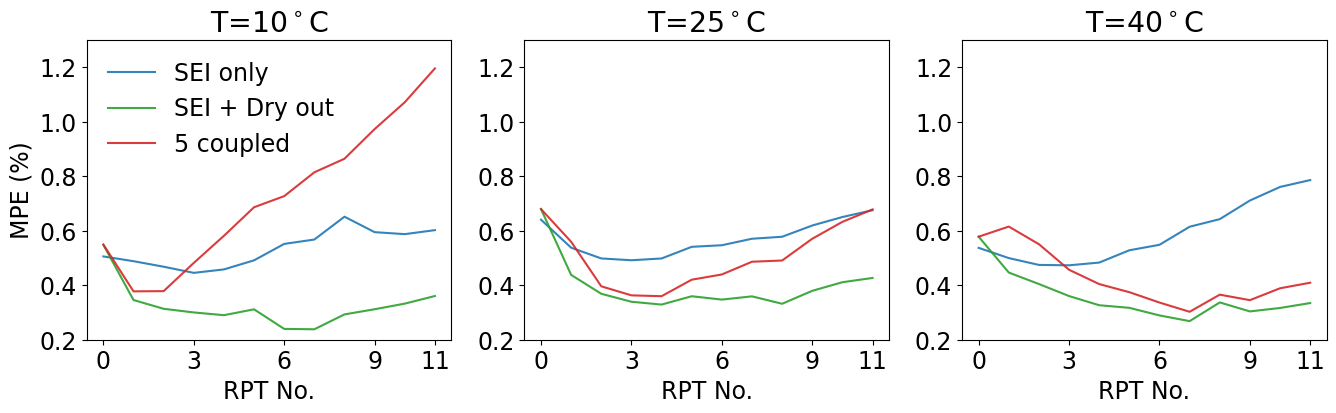

In [37]:
def mean_percentage_error(y_true, y_pred):
    A = y_true; B =  y_pred
    if 0 in A:
        indices = np.where(A == 0)[0]
        A = np.delete(A, indices)
        B = np.delete(B, indices)
        #print(A)
    errors = np.abs(A - B) / np.abs(A)
    mpe = np.mean(errors) * 100
    return mpe
def Calculate_MPE_General(x1,x2,y1,y2):
    from scipy.interpolate import interp1d
    min_x1, max_x1 = min(x1), max(x1)
    min_x2, max_x2 = min(x2), max(x2)

    min_x = max(min_x1, min_x2)
    max_x = min(max_x1, max_x2)

    x1 = np.clip(x1, min_x, max_x)
    x2 = np.clip(x2, min_x, max_x)

    f_interp1 = interp1d(x1, y1, kind='linear', fill_value='extrapolate')
    f_interp2 = interp1d(x2, y2, kind='linear', fill_value='extrapolate')

    num_points = 500  # Adjust this based on your preference
    common_x = np.linspace(min_x, max_x, num_points)

    y1_interp = f_interp1(common_x)
    y2_interp = f_interp2(common_x)

    mpe = mean_percentage_error(y1_interp, y2_interp)
    #print(f"Mean Percentage Error (MPE): {mpe:.2f}%")
    return mpe

def Calculate_0P1C_V_MPE(
        index_exp,Exp_2_AllData,
        case_i,  T_deg,m):
    Cells = Temp_Cell_Exp_All[index_exp-1][str(T_deg)]
    mpe_all = []
    for cell in Cells:
        x_true = np.array(
            Exp_2_AllData[cell]["0.1C voltage"][f"RPT{m}"]["Time (h)"]).tolist()
        y_true = np.array(
            Exp_2_AllData[cell]["0.1C voltage"][f"RPT{m}"]["Voltage (V)"]).tolist()
        x_model = case_i[str(T_deg)]["CD Time [h]"][m]
        y_model = case_i[str(T_deg)]["CD Terminal voltage [V]"][m]
        mpe_all .append( Calculate_MPE_General(x_true,x_model,y_true,y_model)  )
    mep_avg = sum(mpe_all) / len(mpe_all)
    return mep_avg

Cases = [SEI_Exp2_GoodFit,SEIDry_Exp2_GoodFit,Full_Exp2_GoodFit]; 
Str_cases = ["SEI only","SEI + Dry out","5 coupled",]
index_exp = 2;  T_deg_All = [10,25,40] ; i_RPT=0
V_MPE_All = {}
for i,case in enumerate(Cases):
    V_MPE_All[Str_cases[i]] = {}
    for T_deg in T_deg_All:
        V_MPE_All[Str_cases[i]] [T_deg] = []

for i,case in enumerate(Cases):
    for T_deg in T_deg_All:
        for i_RPT in range(12):
            V_MPE_All[Str_cases[i]][T_deg].append(Calculate_0P1C_V_MPE(
                index_exp,Exp_2_AllData,
                Cases[i],T_deg,i_RPT)  )
i=0; T_deg=10
#print(f"{Str_cases[i]}, T={T_deg}degC")
#plt.plot( V_MPE_All[Str_cases[i]][T_deg])
fig, axs = plt.subplots(1,3, figsize=(16,4),gridspec_kw={'top': 0.9, 'bottom': 0.15})
for i_ax,T_deg in enumerate(T_deg_All):
    for j in range(len(Str_cases)):
        axs[i_ax].plot(V_MPE_All[Str_cases[j]][T_deg],  
            '-', color=Default_Colors_Alpha[j],  
            #linestyle=LS[0],
            label=Str_cases[j]) 
        axs[i_ax].set_xlabel(r"RPT No.") 
        axs[i_ax].set_ylim([0.2,1.3])
        axs[i_ax].set_xticks([0,3,6,9,11])
        axs[i_ax].set_title(f"T={T_deg}"+r"$^\circ$C")
    if i_ax == 0:
        axs[i_ax].legend(prop={'family':'DejaVu Sans','size':fs},loc='best',frameon=False)
        axs[i_ax].set_ylabel("MPE (%)")
plt.savefig(target_folder + f"/MPE All 3Ts.png", dpi=dpi)
plt.savefig(target_folder + f"/MPE All 3Ts.svg")
for i_ax,T_deg in enumerate(T_deg_All):
    for j in range(len(Str_cases)):
        print(f"T={T_deg},{Str_cases[j]}:{np.mean(V_MPE_All[Str_cases[j]][T_deg]):.2f}")


/tmp/ipykernel_21890/1383673014.py:35: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  axs[i_ax].plot(
/tmp/ipykernel_21890/1383673014.py:40: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  axs[i_ax].plot(
/tmp/ipykernel_21890/1383673014.py:45: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-" (-> linestyle='-'). The keyword argument will take precedence.
  axs[i_ax].plot(


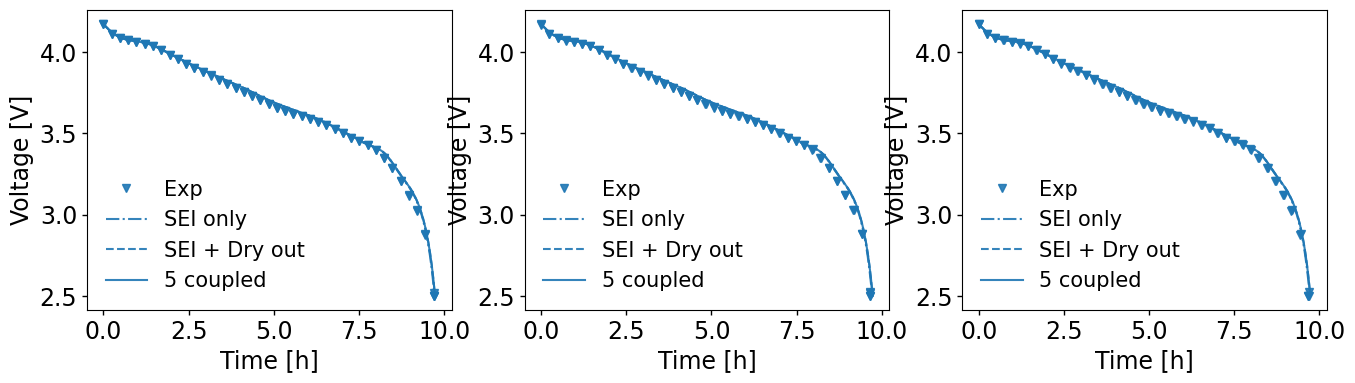

In [38]:
# Fig. v1 - single RPT compare
Default_Colors_Alpha = [
    [31/255, 119/255, 180/255, 0.9], # like blue
    [44/255, 160/255, 44/255,  0.9], # like green  
    [214/255, 39/255, 40/255,  0.9], # like red
    [255/255, 127/255, 14/255, 0.9],]# like orange 


target_folder = os.path.join(SaveFig_Path, Target)
if not os.path.exists(target_folder):
        os.makedirs(target_folder)
T_deg_All = [10,25,40];   LS = ['-.', '--', '-', ':']
i_ax = 0;    Pick_RPTs = [0,5,11]
fig, axs = plt.subplots(1,3, figsize=(16,4),gridspec_kw={'top': 0.9, 'bottom': 0.15})
color_exp     = [0, 0, 0, 0.7]; marker_exp     = "v";
def Plot_T_RPT(i_RPT,i_ax):
        T_deg = T_deg_All[i_ax];
        m = Pick_RPTs[i_RPT]
        count = 0
        for cell in Temp_Cell_Exp_All[index_exp-1][str(T_deg)]:
                # plot less points
                x_data = np.array(Exp_2_AllData[cell]["0.1C voltage"][f"RPT{m}"]["Time (h)"]).tolist()
                y_data = np.array(Exp_2_AllData[cell]["0.1C voltage"][f"RPT{m}"]["Voltage (V)"]).tolist()
                step = len(x_data) // int(ps_num) 
                x_data_sliced = x_data[::step] + [x_data[-1]]
                y_data_sliced = y_data[::step] + [y_data[-1]]
                if count == 0:
                        str_label = "Exp"
                else:
                        str_label = None
                axs[i_ax].plot(
                        x_data_sliced,y_data_sliced, color=Default_Colors_Alpha[i_RPT],
                        linestyle="",marker=marker_exp, label=str_label)
                count += 1
        axs[i_ax].plot(
                SEI_Exp2_GoodFit[str(T_deg)]["CD Time [h]"][m], 
                SEI_Exp2_GoodFit[str(T_deg)]["CD Terminal voltage [V]"][m],  
                '-', color=Default_Colors_Alpha[i_RPT],  
                linestyle=LS[0],label="SEI only") # SEIDry_Exp2_GoodFit["10"]
        axs[i_ax].plot(
                SEIDry_Exp2_GoodFit[str(T_deg)]["CD Time [h]"][m], 
                SEIDry_Exp2_GoodFit[str(T_deg)]["CD Terminal voltage [V]"][m],     
                '-', color=Default_Colors_Alpha[i_RPT],
                linestyle=LS[1], label="SEI + Dry out")
        axs[i_ax].plot(
                Full_Exp2_GoodFit[str(T_deg)]["CD Time [h]"][m], 
                Full_Exp2_GoodFit[str(T_deg)]["CD Terminal voltage [V]"][m],     
                '-', color=Default_Colors_Alpha[i_RPT], 
                linestyle=LS[2],   label="5 coupled")
        axs[i_ax].set_xlabel(r"Time [h]") 
        axs[i_ax].set_ylabel("Voltage [V]")
        labels = axs[i_ax].get_xticklabels() + axs[i_ax].get_yticklabels(); 
        [label.set_fontname('DejaVu Sans') for label in labels]
        axs[i_ax].tick_params(labelcolor='k', labelsize=fs, width=1);del labels
        if i_RPT == 0:
                axs[i_ax].legend(prop={'family':'DejaVu Sans','size':fs-2},loc='best',frameon=False)

#for i_RPT in range(3):
i_RPT  = 0 
for i_ax in range(3):
        Plot_T_RPT(i_RPT,i_ax)
plt.subplots_adjust(top=0.4) 
# fig.suptitle( f"Exp {index_exp}-{T_deg}degC-RPT {m}", fontsize=fs)
#if SaveFig == True:
#plt.savefig(target_folder + f"/Exp {index_exp}-{T_deg}degC-RPT {m}.png", dpi=dpi)
#plt.close() 


m=10; ps_num = 40; index_exp=2;  T_deg = 25; dpi = 300; 


/tmp/ipykernel_21890/1224521302.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm_gray = mpl.cm.get_cmap("gray", 12);      cm_cool =   mpl.cm.get_cmap("cool", 12);


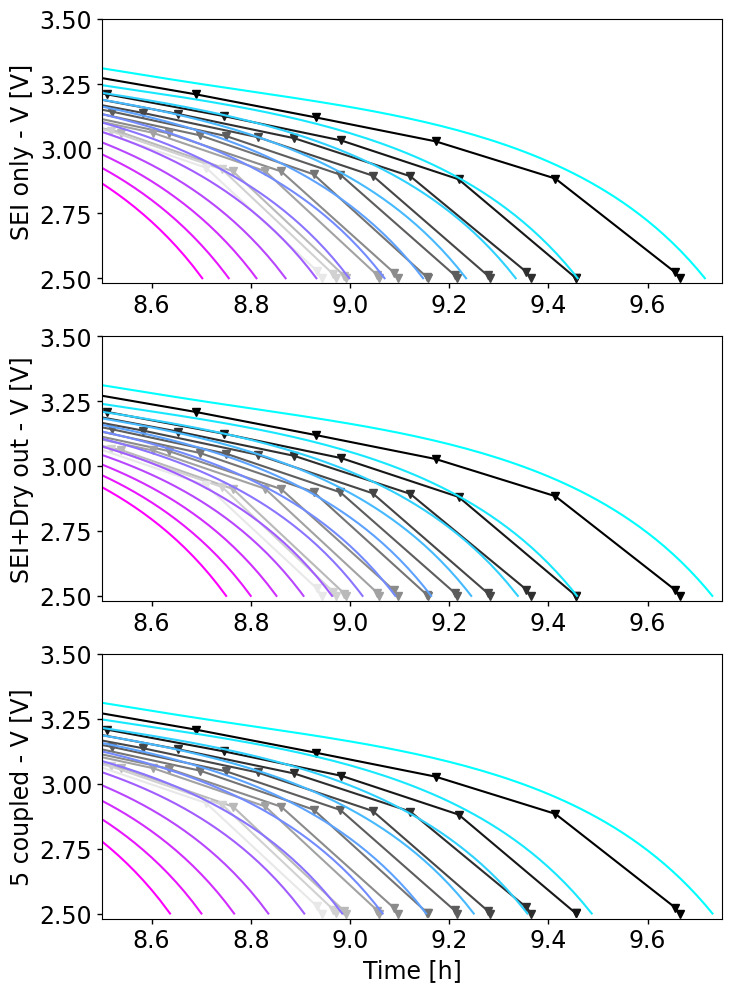

In [39]:
# plot all RPT voltage 
target_folder = os.path.join(SaveFig_Path, Target)
if not os.path.exists(target_folder):
    os.makedirs(target_folder)
cm_gray = mpl.cm.get_cmap("gray", 12);      cm_cool =   mpl.cm.get_cmap("cool", 12); 
T_deg = 25
fig, axs = plt.subplots(3,1, figsize=(8,12),gridspec_kw={'top': 0.9, 'bottom': 0.15})
color_exp     = [0, 0, 0, 0.7]; marker_exp     = "v";
for m in range(12):
    count = 0
    #for cell in Temp_Cell_Exp_All[index_exp-1][str(T_deg)]:
    cell = Temp_Cell_Exp_All[index_exp-1][str(T_deg)][0]
    # plot less points
    x_data = np.array(Exp_2_AllData[cell]["0.1C voltage"][f"RPT{m}"]["Time (h)"]).tolist()
    y_data = np.array(Exp_2_AllData[cell]["0.1C voltage"][f"RPT{m}"]["Voltage (V)"]).tolist()
    step = len(x_data) // int(ps_num) 
    x_data_sliced = x_data[::step] + [x_data[-1]]
    y_data_sliced = y_data[::step] + [y_data[-1]]
    for n in range(3):
        axs[n].plot(
            x_data_sliced,y_data_sliced, color=cm_gray(m),
            marker=marker_exp, )
    count += 1
for m in range(12):
    axs[0].plot(
        SEI_Exp2_GoodFit[str(T_deg)]["CD Time [h]"][m], 
        SEI_Exp2_GoodFit[str(T_deg)]["CD Terminal voltage [V]"][m],  
        '-', color = cm_cool(m),  ) # SEIDry_Exp2_GoodFit["10"]
    axs[1].plot(
        SEIDry_Exp2_GoodFit[str(T_deg)]["CD Time [h]"][m], 
        SEIDry_Exp2_GoodFit[str(T_deg)]["CD Terminal voltage [V]"][m],     
        '-', color = cm_cool(m))
    axs[2].plot(
        Full_Exp2_GoodFit[str(T_deg)]["CD Time [h]"][m], 
        Full_Exp2_GoodFit[str(T_deg)]["CD Terminal voltage [V]"][m],     
        '-', color = cm_cool(m))
axs[2].set_xlabel(r"Time [h]") 
axs[0].set_ylabel("SEI only - V [V]")
axs[1].set_ylabel("SEI+Dry out - V [V]")
axs[2].set_ylabel("5 coupled - V [V]")
for n in range(3):
    axs[n].set_xlim(8.5,9.75)
    axs[n].set_ylim(2.48,3.5)
    
    labels = axs[n].get_xticklabels() + axs[n].get_yticklabels(); 
    [label.set_fontname('DejaVu Sans') for label in labels]
    axs[n].tick_params(labelcolor='k', labelsize=fs, width=1);del labels
    #axs.legend(prop={'family':'DejaVu Sans','size':fs-2},loc='best',frameon=False)
#plt.subplots_adjust(top=0.4) 
# fig.suptitle( f"Exp {index_exp}-{T_deg}degC-RPT {m}", fontsize=fs)
plt.savefig(
    target_folder + f"/Exp {index_exp}-{T_deg}degC-all RPTs - zoom in.png", dpi=dpi)
#plt.close()

In [125]:
sum(SEIDry_Exp2_GoodFit[str(T_deg)]["CDend Porosity"][-1][0:10])

2.0340960422748107

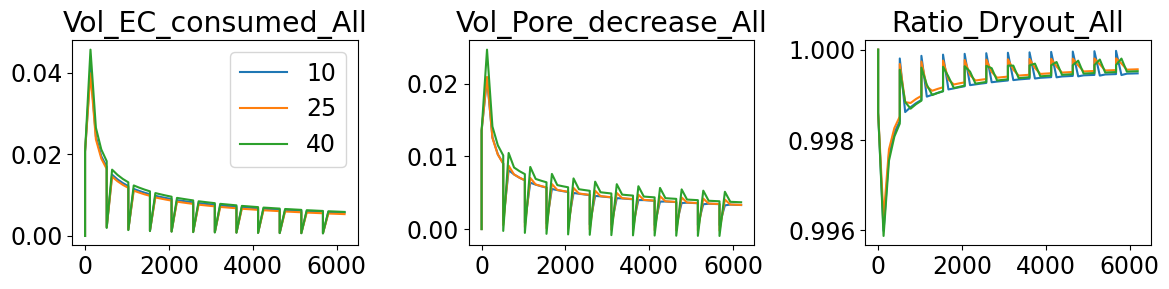

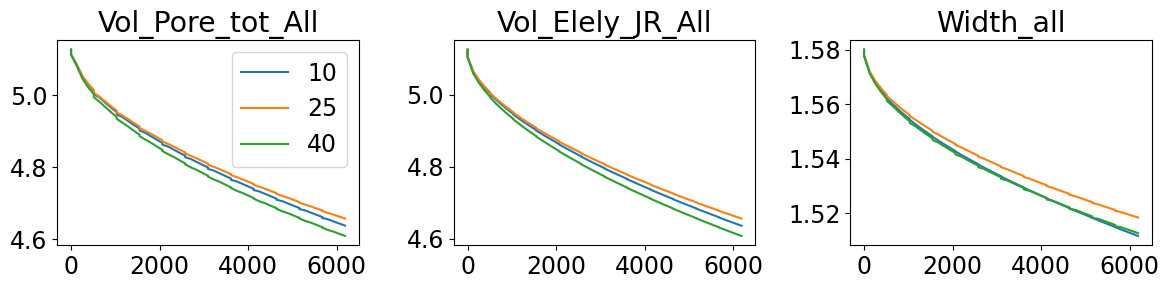

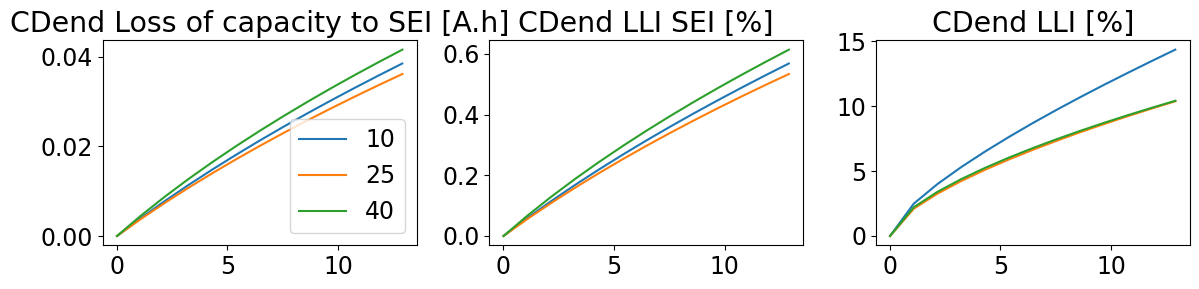

In [139]:
case = Full_Exp2_GoodFit
def Plot_Dry_outside(x_var,plt_vars):
    fig, axs = plt.subplots(1,3, figsize=(12,3.2),tight_layout=True)
    for i in range(3):
        for T_deg in [10,25,40]:
            axs[i].plot(
                case[str(T_deg)][x_var],
                case[str(T_deg)][plt_vars[i]],
                label=str(T_deg))
            axs[i].set_title(plt_vars[i])
            #print(sum(SEIDry_Exp2_GoodFit[str(T_deg)]["CDend Porosity"][-1][0:10]))
    axs[0].legend()
    return
Plot_Dry_outside("Cyc_Update_Index",[
    "Vol_EC_consumed_All","Vol_Pore_decrease_All","Ratio_Dryout_All"])
Plot_Dry_outside("Cyc_Update_Index",[
    "Vol_Pore_tot_All","Vol_Elely_JR_All","Width_all"])
Plot_Dry_outside("Throughput capacity [kA.h]",[
    "CDend Loss of capacity to SEI [A.h]","CDend LLI SEI [%]","CDend LLI [%]"])

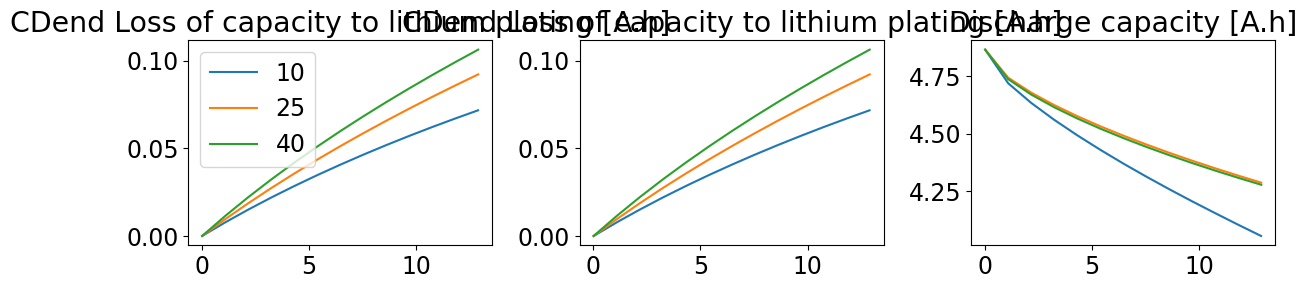

In [140]:
Plot_Dry_outside("Throughput capacity [kA.h]",[
    "CDend Loss of capacity to lithium plating [A.h]",
    "CDend Loss of capacity to lithium plating [A.h]",
    "Discharge capacity [A.h]"])

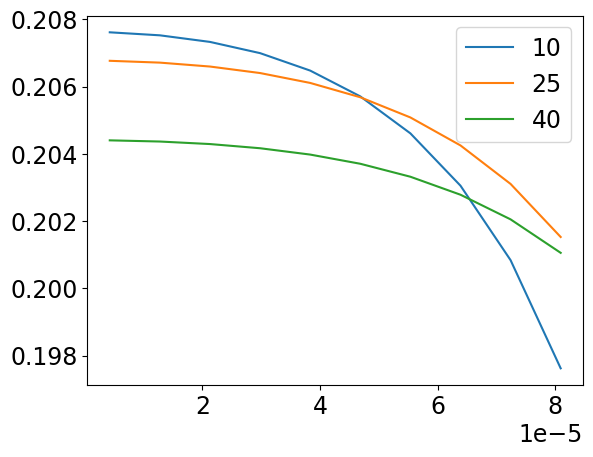

In [142]:
for T_deg in [10,25,40]:
    plt.plot(
        SEIDry_Exp2_GoodFit[str(T_deg)]["x_n [m]"],
        SEIDry_Exp2_GoodFit[str(T_deg)]["CDend Porosity"][-1][0:10],
        label=str(T_deg))
    #axs[i].set_title(plt_vars[i])
    #print(sum(SEIDry_Exp2_GoodFit[str(T_deg)]["CDend Porosity"][-1][0:10]))
plt.legend()

In [116]:
for key in SEIDry_Exp2_GoodFit["10"].keys():
    print(key)

x [m]
x_n [m]
x_s [m]
x_p [m]
CCend Porosity
CCend Negative electrode interfacial current density [A.m-2]
CCend Electrolyte potential [V]
CCend Electrolyte concentration [mol.m-3]
CCend Negative electrode reaction overpotential [V]
CCend Negative particle surface concentration [mol.m-3]
CDend Porosity
CDend Negative electrode interfacial current density [A.m-2]
CDend Electrolyte potential [V]
CDend Electrolyte concentration [mol.m-3]
CDend Negative electrode reaction overpotential [V]
CDend Negative particle surface concentration [mol.m-3]
CD Time [h]
CD Terminal voltage [V]
Discharge capacity [A.h]
Throughput capacity [A.h]
CDend Total lithium capacity in particles [A.h]
CDend Loss of capacity to lithium plating [A.h]
CDend Loss of capacity to SEI [A.h]
CDend Loss of capacity to SEI on cracks [A.h]
CDend Local ECM resistance [Ohm]
CDsta Negative electrode stoichiometry
CDend Negative electrode stoichiometry
CDsta Positive electrode stoichiometry
CDend Positive electrode stoichiometry


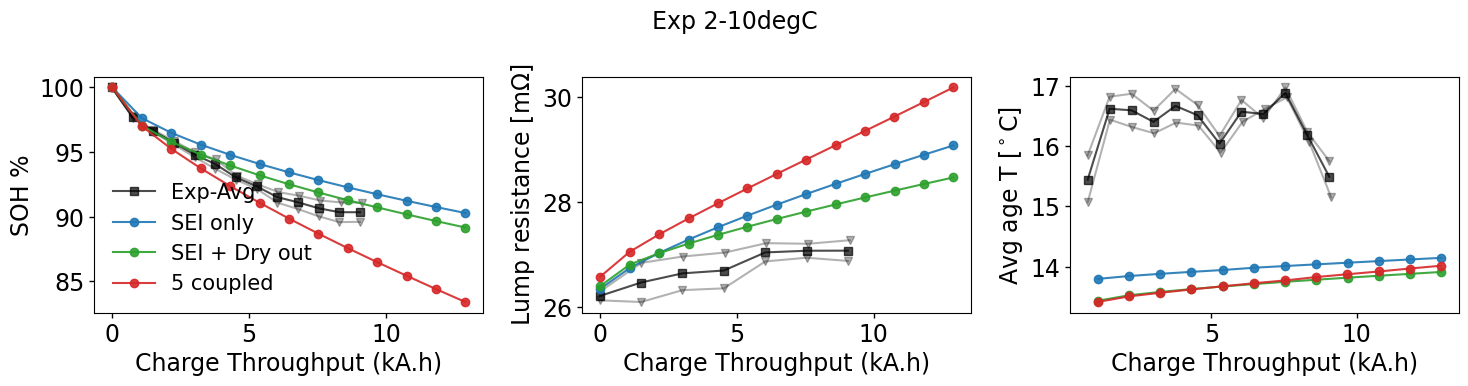

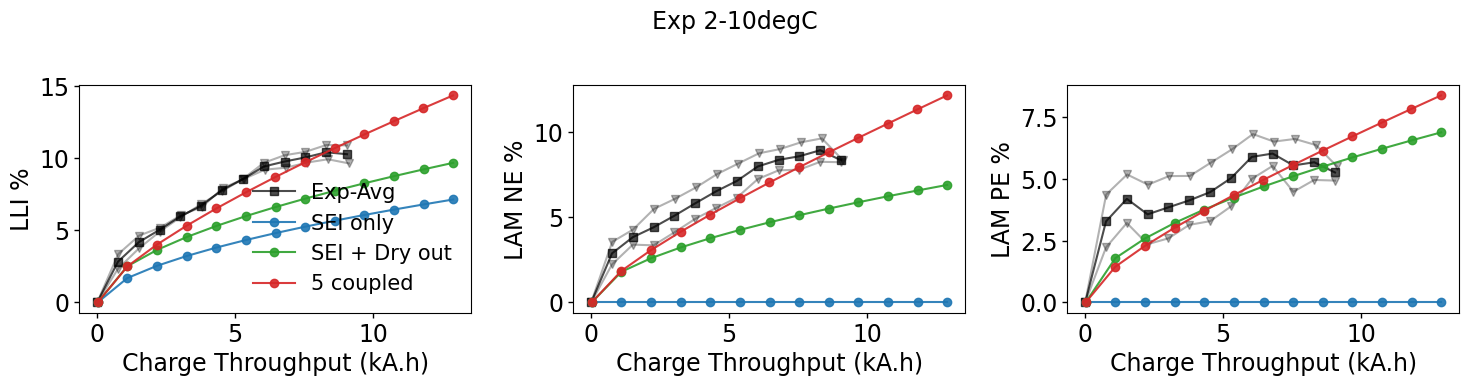

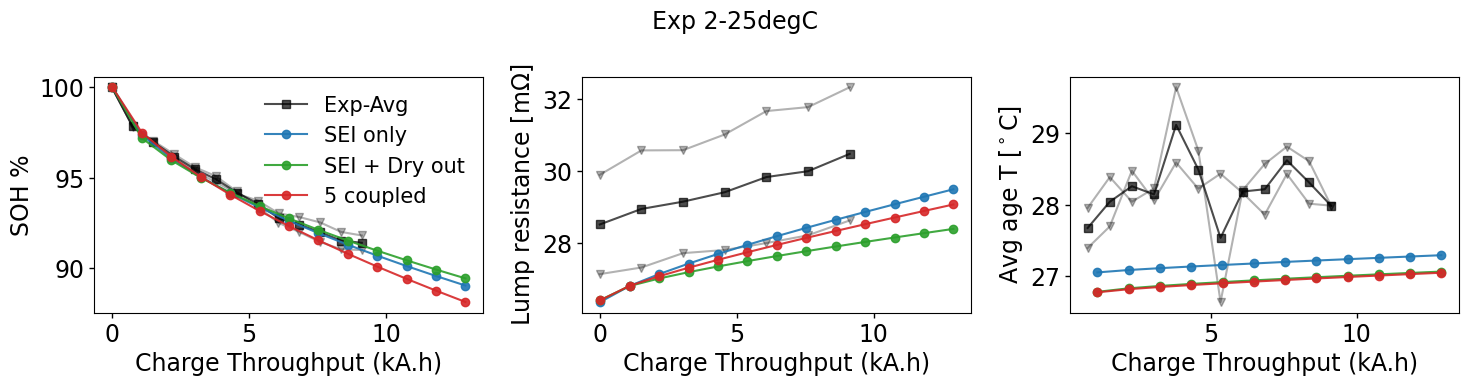

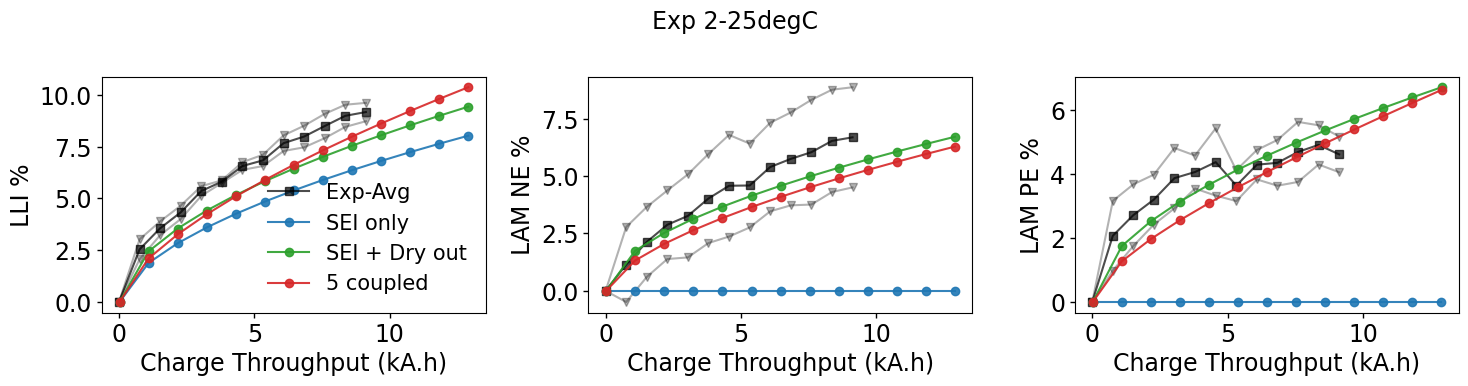

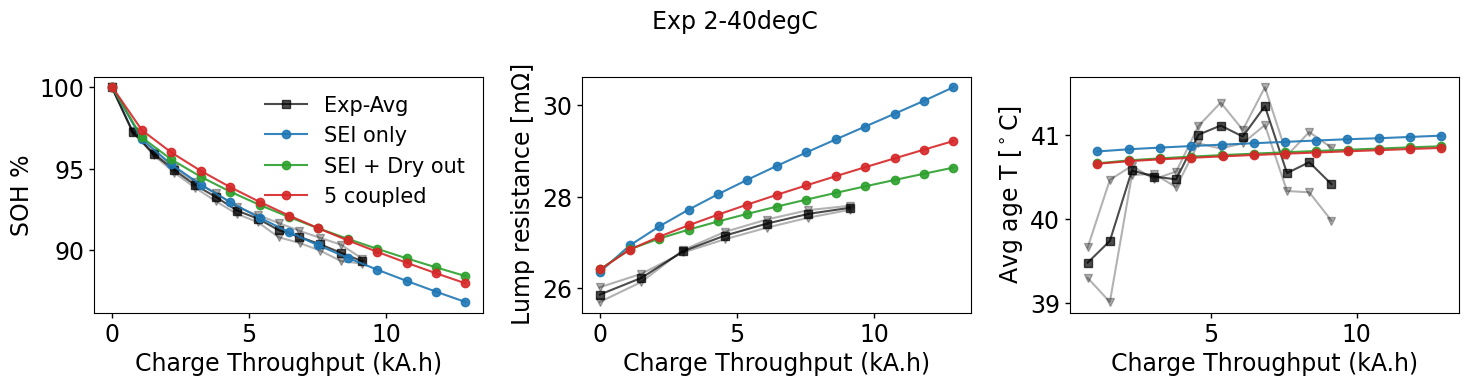

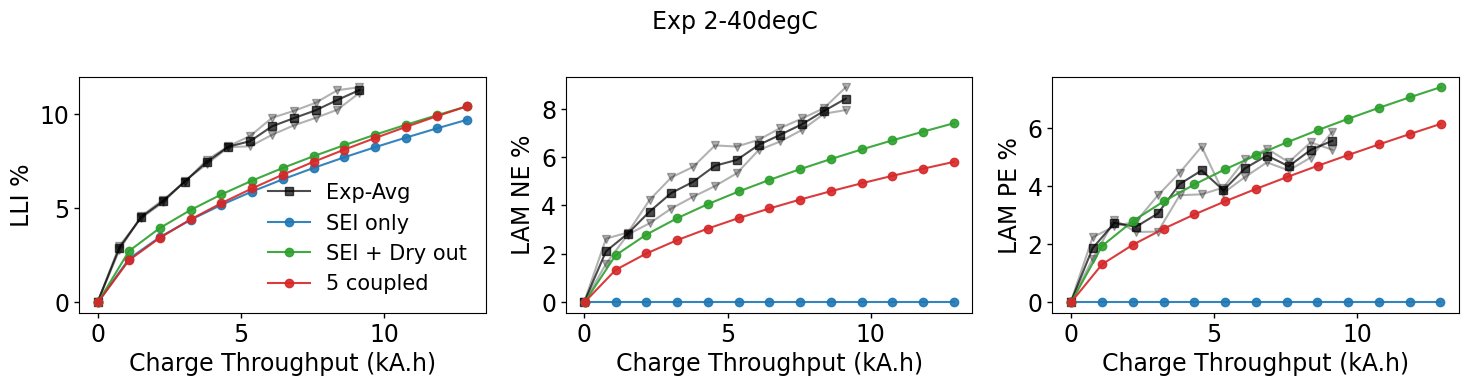

In [40]:
# now compare SOH, resistance, and T rise
# Plot Charge Throughput (A.h) vs SOH
index_exp = 2; Exp_Any_AllData = Exp_2_AllData; 
Temp_Cell_Exp = Temp_Cell_Exp_All[index_exp-1] 
Cases = [SEI_Exp2_GoodFit,SEIDry_Exp2_GoodFit,Full_Exp2_GoodFit]; Str_cases = ["SEI only","SEI + Dry out","5 coupled",]
# [0,0] --> [0]; [1,1] --> [1]; [1,2] --> [2]

# [0,1] --> [0]; [0,2] --> [1]; [1,0] --> [2]
def Compare_Summary(Temp_Cell_Exp,T_deg):
    # fig. 1
    fig, axs = plt.subplots(1,3, figsize=(15,4),tight_layout=True) 
    color_exp     = [0, 0, 0, 0.3]; marker_exp     = "v";
    color_exp_Avg = [0, 0, 0, 0.7]; marker_exp_Avg = "s";
    Exp_temp_i_cell = Temp_Cell_Exp[str(int(T_deg))]
    XY_pack = Get_Cell_Mean_1T_1Exp(Exp_Any_AllData,Exp_temp_i_cell) 
    [X_1_st,X_5_st,Y_1_st_avg,Y_2_st_avg,
        Y_3_st_avg,Y_4_st_avg,Y_5_st_avg,Y_6_st_avg]  = XY_pack
    for cell in Exp_temp_i_cell:
        df = Exp_Any_AllData[cell]["Extract Data"]
        chThr_temp = np.array(df["Charge Throughput (A.h)"])/1e3
        df_DMA = Exp_Any_AllData[cell]["DMA"]["LLI_LAM"]
        axs[0].plot(
            chThr_temp,np.array(df_DMA["SoH"])*100,
            color=color_exp,marker=marker_exp,) # label=f"Cell {cell}" 
        index_Res = df[df['0.1s Resistance (Ohms)'].le(10)].index
        axs[1].plot(
            #df["Days of degradation"][index_Res],
            np.array(df["Charge Throughput (A.h)"][index_Res])/1e3,
            np.array(df["0.1s Resistance (Ohms)"][index_Res])*1e3,
            color=color_exp,marker=marker_exp)
        axs[2].plot(
            chThr_temp[1:],
            np.array(df["Age set average temperature (degC)"][1:]).astype(float),
            color=color_exp,marker=marker_exp,)
    axs[0].plot(
        X_1_st,Y_1_st_avg,color=color_exp_Avg,
        marker=marker_exp_Avg,label=f"Exp-Avg") 
    axs[1].plot(
        X_5_st,Y_5_st_avg,
        color=color_exp_Avg,marker=marker_exp_Avg)
    axs[2].plot(
        X_1_st[1:],Y_6_st_avg[1:],
        color=color_exp_Avg,marker=marker_exp_Avg,)
    # Modelling:
    for k,case in enumerate(Cases):
        axs[0].plot(
            case[str(T_deg)]['Throughput capacity [kA.h]'], 
            case[str(T_deg)]['CDend SOH [%]'], 
            '-o', color = Default_Colors_Alpha[k], label=Str_cases[k])
        axs[1].plot(
            case[str(T_deg)]["Throughput capacity [kA.h]"], 
            np.array(case[str(T_deg)]["Res_0p5C_50SOC"]),     '-o', 
            color = Default_Colors_Alpha[k], ) 
        axs[2].plot(
            case[str(T_deg)]["Throughput capacity [kA.h]"][1:], 
            np.array(case[str(T_deg)]["avg_Age_T"][1:]),     '-o',
            color = Default_Colors_Alpha[k],  ) 

    axs[0].set_ylabel("SOH %")
    axs[1].set_ylabel(r"Lump resistance [m$\Omega$]")
    axs[2].set_ylabel(r"Avg age T [$^\circ$C]")
    axs[0].legend(prop={'family':'DejaVu Sans','size':fs-2},loc='best',frameon=False)
    for k in range(3):
        axs[k].set_xlabel("Charge Throughput (kA.h)")
        labels = axs[k].get_xticklabels() + axs[k].get_yticklabels(); 
        [label.set_fontname('DejaVu Sans') for label in labels]
        axs[k].tick_params(labelcolor='k', labelsize=fs, width=1);del labels
    fig.suptitle( f"Exp {index_exp}-{T_deg}degC", fontsize=fs)
    #axs[n,1].ticklabel_format(style='sci', axis='x', scilimits=(-1e-2,1e-2))
    plt.savefig(
        target_folder + f"/Exp {index_exp}-{T_deg}degC-SOH + R + T.png", dpi=dpi)
    plt.savefig(
        target_folder + f"/Exp {index_exp}-{T_deg}degC-SOH + R + T.svg")
    # fig. 2 
    fig, axs = plt.subplots(1,3, figsize=(15,4),tight_layout=True) 
    for cell in Exp_temp_i_cell:
        df = Exp_Any_AllData[cell]["Extract Data"]
        chThr_temp = np.array(df["Charge Throughput (A.h)"])/1e3
        df_DMA = Exp_Any_AllData[cell]["DMA"]["LLI_LAM"]
        axs[0].plot(
            chThr_temp,np.array(df_DMA["LLI"])*100,
            color=color_exp,marker=marker_exp,) # label=f"Cell {cell}"  
        axs[1].plot(
            chThr_temp,np.array(df_DMA["LAM NE_tot"])*100,
            color=color_exp,marker=marker_exp, )
        axs[2].plot(
            chThr_temp,np.array(df_DMA["LAM PE"])*100,
            color=color_exp,marker=marker_exp,)
    # update 230312- plot resistance here
    # Exp_1_AllData["A"]["Extract Data"]["0.1s Resistance (Ohms)"]
    axs[0].plot(
        X_1_st,Y_2_st_avg,color=color_exp_Avg,
        marker=marker_exp_Avg,label=f"Exp-Avg")  
    axs[1].plot(
        X_1_st,Y_3_st_avg,color=color_exp_Avg,
        marker=marker_exp_Avg, )
    axs[2].plot(
        X_1_st,Y_4_st_avg,
        color=color_exp_Avg,marker=marker_exp_Avg,)
    # Experiment:
    for k,case in enumerate(Cases):
        axs[0].plot(
            case[str(T_deg)]['Throughput capacity [kA.h]'], 
            case[str(T_deg)]["CDend LLI [%]"],'-o',
            color = Default_Colors_Alpha[k], label=Str_cases[k])
        axs[1].plot(
            case[str(T_deg)]["Throughput capacity [kA.h]"], 
            case[str(T_deg)]["CDend LAM_ne [%]"],     '-o',
            color = Default_Colors_Alpha[k], ) 
        axs[2].plot(
            case[str(T_deg)]["Throughput capacity [kA.h]"], 
            case[str(T_deg)]["CDend LAM_pe [%]"],     '-o',
            color = Default_Colors_Alpha[k],  ) 
    
    axs[0].set_ylabel("LLI %")
    axs[1].set_ylabel("LAM NE %")
    axs[2].set_ylabel("LAM PE %")
    axs[0].legend(prop={'family':'DejaVu Sans','size':fs-2},loc='best',frameon=False)
    for k in range(3):
        axs[k].set_xlabel("Charge Throughput (kA.h)")
        labels = axs[k].get_xticklabels() + axs[k].get_yticklabels(); 
        [label.set_fontname('DejaVu Sans') for label in labels]
        axs[k].tick_params(labelcolor='k', labelsize=fs, width=1);del labels
    fig.suptitle( f"Exp {index_exp}-{T_deg}degC", fontsize=fs)
    #axs[n,1].ticklabel_format(style='sci', axis='x', scilimits=(-1e-2,1e-2))
    plt.savefig(
        target_folder + f"/Exp {index_exp}-{T_deg}degC-DMA.png", dpi=dpi)
    plt.savefig(
        target_folder + f"/Exp {index_exp}-{T_deg}degC-DMA.svg")

    
    return 
for T_deg in [10,25,40]:
    Compare_Summary(Temp_Cell_Exp,T_deg)



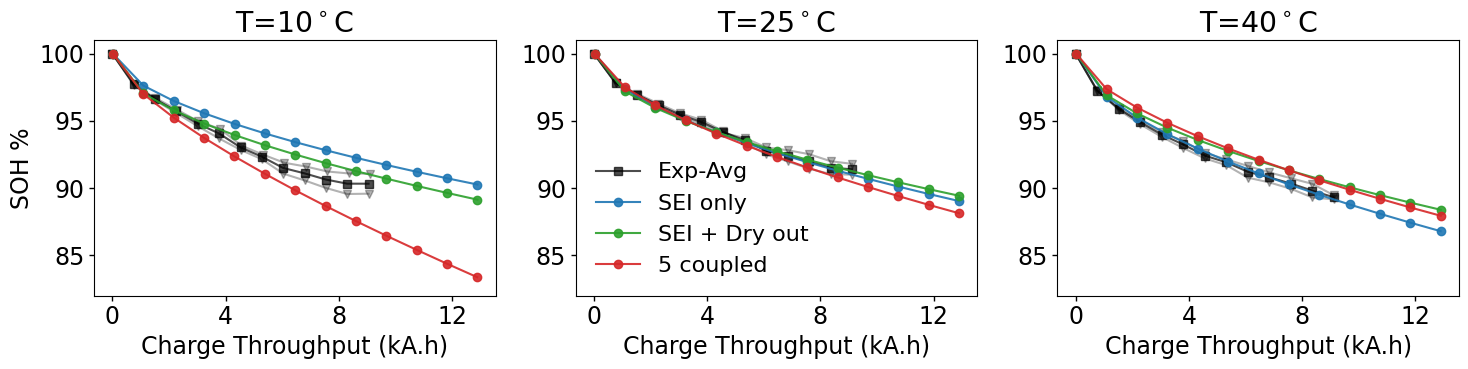

In [42]:
# sort differently: plot each row as one output, each column as one temperature:
# Fig. 1 - SOH, range: 102 - 82;
fig, axs = plt.subplots(1,3, figsize=(15,4),tight_layout=True) 
color_exp     = [0, 0, 0, 0.3]; marker_exp     = "v";
color_exp_Avg = [0, 0, 0, 0.7]; marker_exp_Avg = "s";
index_exp = 2; Exp_Any_AllData = Exp_2_AllData; 
Temp_Cell_Exp = Temp_Cell_Exp_All[index_exp-1] 

for i,T_deg in enumerate([10,25,40]):
    Exp_temp_i_cell = Temp_Cell_Exp[str(int(T_deg))]
    XY_pack = Get_Cell_Mean_1T_1Exp(Exp_Any_AllData,Exp_temp_i_cell) 
    [X_1_st,X_5_st,Y_1_st_avg,Y_2_st_avg,
        Y_3_st_avg,Y_4_st_avg,Y_5_st_avg,Y_6_st_avg]  = XY_pack
    for cell in Exp_temp_i_cell:
        df = Exp_Any_AllData[cell]["Extract Data"]
        chThr_temp = np.array(df["Charge Throughput (A.h)"])/1e3
        df_DMA = Exp_Any_AllData[cell]["DMA"]["LLI_LAM"]
        axs[i].plot(
            chThr_temp,np.array(df_DMA["SoH"])*100,
            color=color_exp,marker=marker_exp,) # label=f"Cell {cell}" 
    axs[i].plot(
        X_1_st,Y_1_st_avg,color=color_exp_Avg,
        marker=marker_exp_Avg,label=f"Exp-Avg") 
    for k,case in enumerate(Cases):
        axs[i].plot(
            case[str(T_deg)]['Throughput capacity [kA.h]'], 
            case[str(T_deg)]['CDend SOH [%]'], 
            '-o', color = Default_Colors_Alpha[k], label=Str_cases[k])
    axs[i].set_xlabel("Charge Throughput (kA.h)")
    axs[i].set_ylim(82,101)
    axs[i].set_xticks([0,4,8,12])
    axs[i].set_title(f"T={T_deg}"+r"$^\circ$C")
axs[0].set_ylabel("SOH %")
axs[1].legend(prop={'family':'DejaVu Sans','size':fs-1},loc='best',frameon=False)
for k in range(3):
    labels = axs[k].get_xticklabels() + axs[k].get_yticklabels(); 
    [label.set_fontname('DejaVu Sans') for label in labels]
    axs[k].tick_params(labelcolor='k', labelsize=fs, width=1);del labels  
plt.savefig(
    target_folder + f"/Exp {index_exp}-SOH-all_Ts.png", dpi=dpi)
plt.savefig(
    target_folder + f"/Exp {index_exp}-SOH-all_Ts.svg")  



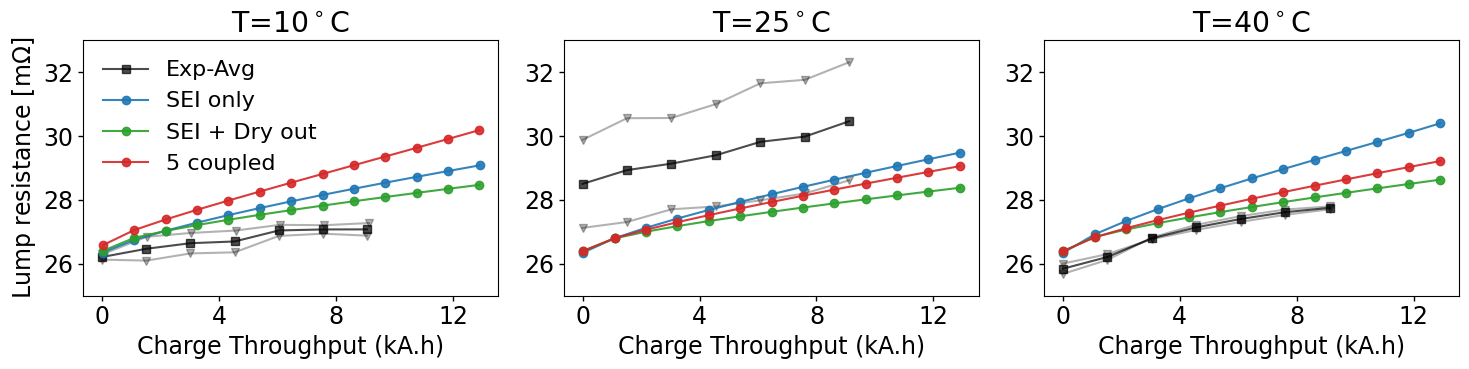

In [43]:
# Fig. 2 - Lump resistance - 24-34
fig, axs = plt.subplots(1,3, figsize=(15,4),tight_layout=True) 
color_exp     = [0, 0, 0, 0.3]; marker_exp     = "v";
color_exp_Avg = [0, 0, 0, 0.7]; marker_exp_Avg = "s";
index_exp = 2; Exp_Any_AllData = Exp_2_AllData; 
Temp_Cell_Exp = Temp_Cell_Exp_All[index_exp-1] 

for i,T_deg in enumerate([10,25,40]):
    Exp_temp_i_cell = Temp_Cell_Exp[str(int(T_deg))]
    XY_pack = Get_Cell_Mean_1T_1Exp(Exp_Any_AllData,Exp_temp_i_cell) 
    [X_1_st,X_5_st,Y_1_st_avg,Y_2_st_avg,
        Y_3_st_avg,Y_4_st_avg,Y_5_st_avg,Y_6_st_avg]  = XY_pack
    for cell in Exp_temp_i_cell:
        df = Exp_Any_AllData[cell]["Extract Data"]
        chThr_temp = np.array(df["Charge Throughput (A.h)"])/1e3
        df_DMA = Exp_Any_AllData[cell]["DMA"]["LLI_LAM"]
        index_Res = df[df['0.1s Resistance (Ohms)'].le(10)].index
        axs[i].plot(
            np.array(df["Charge Throughput (A.h)"][index_Res])/1e3,
            np.array(df["0.1s Resistance (Ohms)"][index_Res])*1e3,
            color=color_exp,marker=marker_exp)
    axs[i].plot(
        X_5_st,Y_5_st_avg,color=color_exp_Avg,
        marker=marker_exp_Avg,label=f"Exp-Avg") 
    for k,case in enumerate(Cases):
        axs[i].plot(
            case[str(T_deg)]["Throughput capacity [kA.h]"], 
            np.array(case[str(T_deg)]["Res_0p5C_50SOC"]), 
            '-o', color = Default_Colors_Alpha[k], label=Str_cases[k])
    axs[i].set_xlabel("Charge Throughput (kA.h)")
    axs[i].set_ylim(25,33)
    axs[i].set_xticks([0,4,8,12]);
    axs[i].set_title(f"T={T_deg}"+r"$^\circ$C")
axs[0].set_ylabel(r"Lump resistance [m$\Omega$]")
axs[0].legend(prop={'family':'DejaVu Sans','size':fs-1},loc='best',frameon=False)
for k in range(3):
    labels = axs[k].get_xticklabels() + axs[k].get_yticklabels(); 
    [label.set_fontname('DejaVu Sans') for label in labels]
    axs[k].tick_params(labelcolor='k', labelsize=fs, width=1);del labels  
plt.savefig(
    target_folder + f"/Exp {index_exp}-Resistance-all_Ts.png", dpi=dpi)
plt.savefig(
    target_folder + f"/Exp {index_exp}-Resistance-all_Ts.svg")  

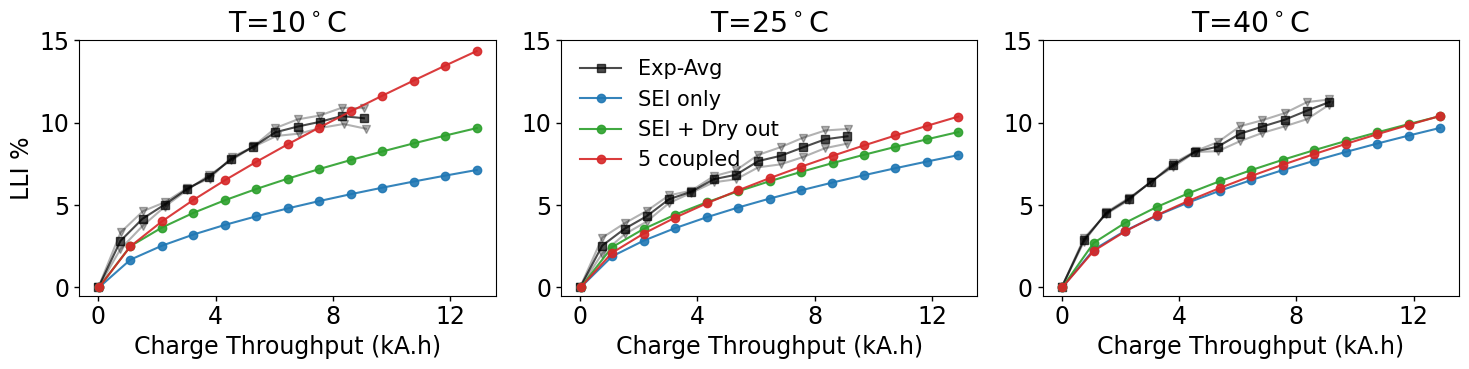

In [44]:
# Fig. 3 - LLI% - -1 ~15
fig, axs = plt.subplots(1,3, figsize=(15,4),tight_layout=True) 
color_exp     = [0, 0, 0, 0.3]; marker_exp     = "v";
color_exp_Avg = [0, 0, 0, 0.7]; marker_exp_Avg = "s";
index_exp = 2; Exp_Any_AllData = Exp_2_AllData; 
Temp_Cell_Exp = Temp_Cell_Exp_All[index_exp-1] 

for i,T_deg in enumerate([10,25,40]):
    Exp_temp_i_cell = Temp_Cell_Exp[str(int(T_deg))]
    XY_pack = Get_Cell_Mean_1T_1Exp(Exp_Any_AllData,Exp_temp_i_cell) 
    [X_1_st,X_5_st,Y_1_st_avg,Y_2_st_avg,
        Y_3_st_avg,Y_4_st_avg,Y_5_st_avg,Y_6_st_avg]  = XY_pack
    for cell in Exp_temp_i_cell:
        df = Exp_Any_AllData[cell]["Extract Data"]
        chThr_temp = np.array(df["Charge Throughput (A.h)"])/1e3
        df_DMA = Exp_Any_AllData[cell]["DMA"]["LLI_LAM"]
        index_Res = df[df['0.1s Resistance (Ohms)'].le(10)].index
        axs[i].plot(
            chThr_temp,np.array(df_DMA["LLI"])*100,
            color=color_exp,marker=marker_exp,) # label=f"Cell {cell}"  
    axs[i].plot(
        X_1_st,Y_2_st_avg,color=color_exp_Avg,
        marker=marker_exp_Avg,label=f"Exp-Avg") 
    for k,case in enumerate(Cases):
        axs[i].plot(
            case[str(T_deg)]['Throughput capacity [kA.h]'], 
            case[str(T_deg)]["CDend LLI [%]"],'-o',
            color = Default_Colors_Alpha[k], label=Str_cases[k])
    axs[i].set_xlabel("Charge Throughput (kA.h)")
    axs[i].set_ylim(-0.5,15)
    axs[i].set_title(f"T={T_deg}"+r"$^\circ$C")
    axs[i].set_xticks([0,4,8,12]);
axs[0].set_ylabel("LLI %")
axs[1].legend(prop={'family':'DejaVu Sans','size':fs-2},loc='best',frameon=False)
for k in range(3):
    labels = axs[k].get_xticklabels() + axs[k].get_yticklabels(); 
    [label.set_fontname('DejaVu Sans') for label in labels]
    axs[k].tick_params(labelcolor='k', labelsize=fs, width=1);del labels  
plt.savefig(
    target_folder + f"/Exp {index_exp}-LLI-all_Ts.png", dpi=dpi)
plt.savefig(
    target_folder + f"/Exp {index_exp}-LLI-all_Ts.svg")  


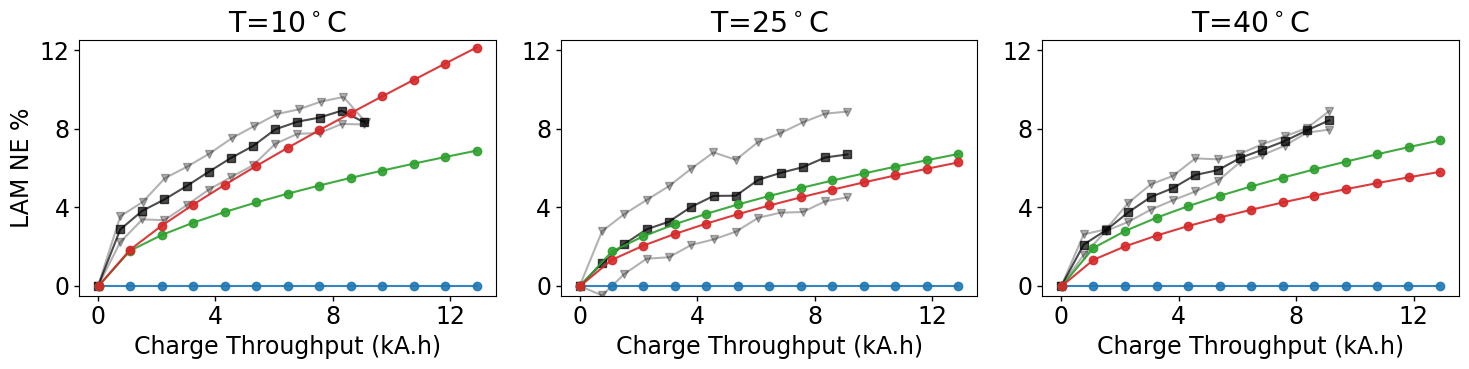

In [45]:
# Fig. 4 - LAM NE % range: -1 ~ 13
fig, axs = plt.subplots(1,3, figsize=(15,4),tight_layout=True) 
color_exp     = [0, 0, 0, 0.3]; marker_exp     = "v";
color_exp_Avg = [0, 0, 0, 0.7]; marker_exp_Avg = "s";
index_exp = 2; Exp_Any_AllData = Exp_2_AllData; 
Temp_Cell_Exp = Temp_Cell_Exp_All[index_exp-1] 

for i,T_deg in enumerate([10,25,40]):
    Exp_temp_i_cell = Temp_Cell_Exp[str(int(T_deg))]
    XY_pack = Get_Cell_Mean_1T_1Exp(Exp_Any_AllData,Exp_temp_i_cell) 
    [X_1_st,X_5_st,Y_1_st_avg,Y_2_st_avg,
        Y_3_st_avg,Y_4_st_avg,Y_5_st_avg,Y_6_st_avg]  = XY_pack
    for cell in Exp_temp_i_cell:
        df = Exp_Any_AllData[cell]["Extract Data"]
        chThr_temp = np.array(df["Charge Throughput (A.h)"])/1e3
        df_DMA = Exp_Any_AllData[cell]["DMA"]["LLI_LAM"]
        axs[i].plot(
            chThr_temp,np.array(df_DMA["LAM NE_tot"])*100,
            color=color_exp,marker=marker_exp,) # label=f"Cell {cell}"  
    axs[i].plot(
        X_1_st,Y_3_st_avg,color=color_exp_Avg,
        marker=marker_exp_Avg,label=f"Exp-Avg") 
    for k,case in enumerate(Cases):
        axs[i].plot(
            case[str(T_deg)]['Throughput capacity [kA.h]'], 
            case[str(T_deg)]["CDend LAM_ne [%]"],'-o',
            color = Default_Colors_Alpha[k], label=Str_cases[k])
    axs[i].set_xlabel("Charge Throughput (kA.h)")
    axs[i].set_ylim(-0.5,12.5)
    axs[i].set_xticks([0,4,8,12])
    axs[i].set_title(f"T={T_deg}"+r"$^\circ$C")
    axs[i].set_yticks([0,4,8,12])
axs[0].set_ylabel("LAM NE %")
#axs[1].legend(prop={'family':'DejaVu Sans','size':fs-2},loc='best',frameon=False)
for k in range(3):
    labels = axs[k].get_xticklabels() + axs[k].get_yticklabels(); 
    [label.set_fontname('DejaVu Sans') for label in labels]
    axs[k].tick_params(labelcolor='k', labelsize=fs, width=1);del labels  
plt.savefig(
    target_folder + f"/Exp {index_exp}-LAM_NE-all_Ts.png", dpi=dpi)
plt.savefig(
    target_folder + f"/Exp {index_exp}-LAM_NE-all_Ts.svg")  


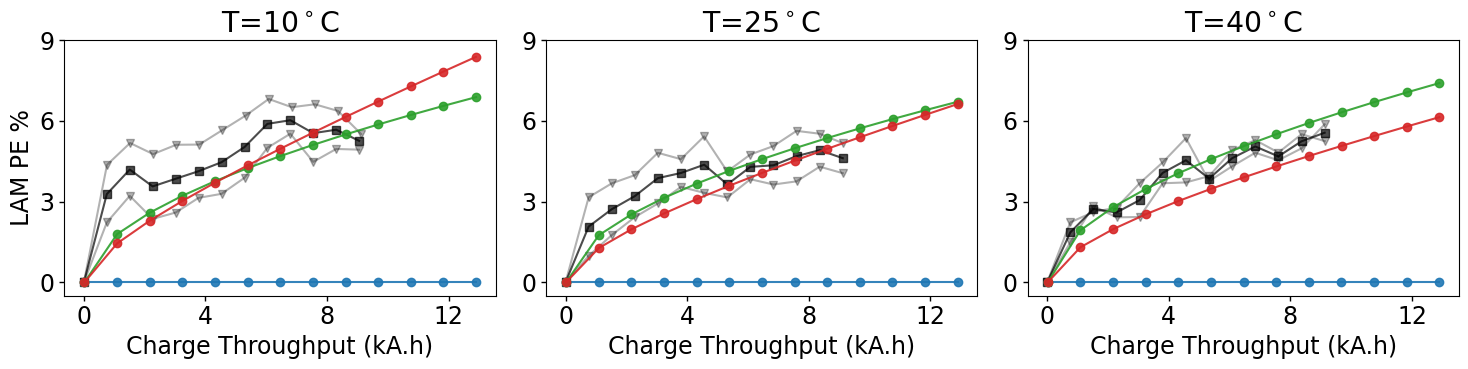

In [46]:
# Fig. 5 - LAM PE % range: -0.7 ~ 8
fig, axs = plt.subplots(1,3, figsize=(15,4),tight_layout=True) 
color_exp     = [0, 0, 0, 0.3]; marker_exp     = "v";
color_exp_Avg = [0, 0, 0, 0.7]; marker_exp_Avg = "s";
index_exp = 2; Exp_Any_AllData = Exp_2_AllData; 
Temp_Cell_Exp = Temp_Cell_Exp_All[index_exp-1] 

for i,T_deg in enumerate([10,25,40]):
    Exp_temp_i_cell = Temp_Cell_Exp[str(int(T_deg))]
    XY_pack = Get_Cell_Mean_1T_1Exp(Exp_Any_AllData,Exp_temp_i_cell) 
    [X_1_st,X_5_st,Y_1_st_avg,Y_2_st_avg,
        Y_3_st_avg,Y_4_st_avg,Y_5_st_avg,Y_6_st_avg]  = XY_pack
    for cell in Exp_temp_i_cell:
        df = Exp_Any_AllData[cell]["Extract Data"]
        chThr_temp = np.array(df["Charge Throughput (A.h)"])/1e3
        df_DMA = Exp_Any_AllData[cell]["DMA"]["LLI_LAM"]
        axs[i].plot(
            chThr_temp,np.array(df_DMA["LAM PE"])*100,
            color=color_exp,marker=marker_exp,) # label=f"Cell {cell}"  
    axs[i].plot(
        X_1_st,Y_4_st_avg,color=color_exp_Avg,
        marker=marker_exp_Avg,label=f"Exp-Avg") 
    for k,case in enumerate(Cases):
        axs[i].plot(
            case[str(T_deg)]['Throughput capacity [kA.h]'], 
            case[str(T_deg)]["CDend LAM_pe [%]"],'-o',
            color = Default_Colors_Alpha[k], label=Str_cases[k])
    axs[i].set_xlabel("Charge Throughput (kA.h)")
    axs[i].set_ylim(-0.5,9)
    axs[i].set_xticks([0,4,8,12])
    axs[i].set_title(f"T={T_deg}"+r"$^\circ$C")
    axs[i].set_yticks([0,3,6,9])
axs[0].set_ylabel("LAM PE %")
#axs[1].legend(prop={'family':'DejaVu Sans','size':fs-2},loc='best',frameon=False)
for k in range(3):
    labels = axs[k].get_xticklabels() + axs[k].get_yticklabels(); 
    [label.set_fontname('DejaVu Sans') for label in labels]
    axs[k].tick_params(labelcolor='k', labelsize=fs, width=1);del labels  
plt.savefig(
    target_folder + f"/Exp {index_exp}-LAM_PE-all_Ts.png", dpi=dpi)
plt.savefig(
    target_folder + f"/Exp {index_exp}-LAM_PE-all_Ts.svg")  


' plt.savefig(\n    target_folder + f"/SEI_DryOut LLI break down.png", dpi=dpi)\nplt.savefig(\n    target_folder + f"/SEI_DryOut LLI break down.svg")   '

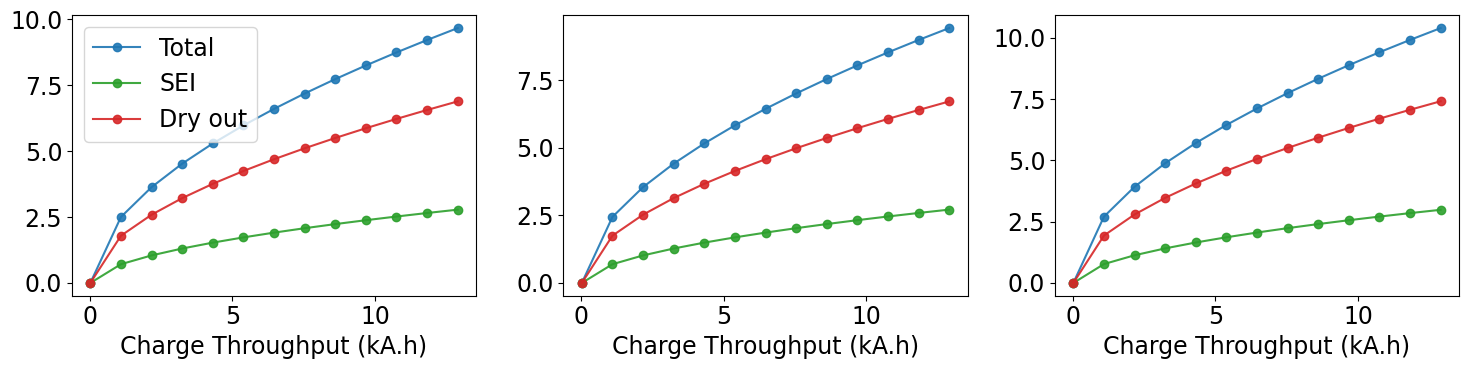

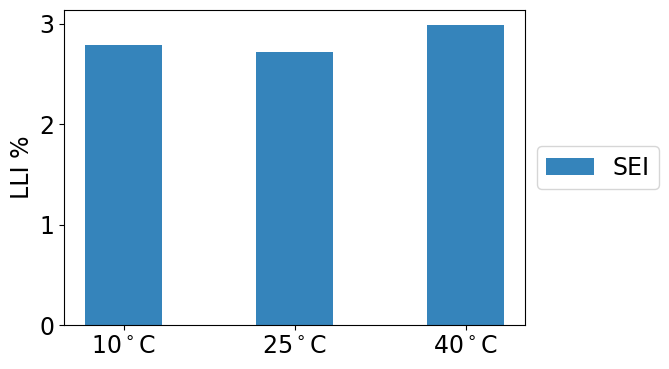

In [141]:
# plot break down of LLI for SEI-dry and Full
# - due to SEI and due to dry-out; 
# - due to SEI, SEI on crack, LiP and dry-out
case = SEIDry_Exp2_GoodFit
LLI_to_SEI_allTs=[]; LLI_to_Dry_allTs =[]
fig, axs = plt.subplots(1,3, figsize=(15,4),tight_layout=True) 
for i,T_deg in enumerate([10,25,40]):
    LLI_to_SEI = (
        np.array(case[str(T_deg)]['CDend LLI SEI on cracks [%]'])
        +
        np.array(case[str(T_deg)]['CDend LLI SEI [%]']) )
    LLI_to_Dry = (
        np.array(case[str(T_deg)]['CDend LLI [%]'])
        -
        LLI_to_SEI)
    LLI_to_SEI_allTs.append(LLI_to_SEI[-1])
    LLI_to_Dry_allTs.append(LLI_to_Dry[-1])
    axs[i].plot(
        case[str(T_deg)]['Throughput capacity [kA.h]'], 
        case[str(T_deg)]['CDend LLI [%]'], 
        '-o', color = Default_Colors_Alpha[0], label="Total")
    axs[i].plot(
        case[str(T_deg)]['Throughput capacity [kA.h]'], 
        LLI_to_SEI, 
        '-o', color = Default_Colors_Alpha[1], label="SEI")
    axs[i].plot(
        case[str(T_deg)]['Throughput capacity [kA.h]'], 
        LLI_to_Dry, 
        '-o', color = Default_Colors_Alpha[2], label="Dry out")
    axs[i].set_xlabel("Charge Throughput (kA.h)")
axs[0].legend()

# 
fig, ax = plt.subplots(figsize=(7,4),tight_layout=True) 
X_labels = (
    r"10$^\circ$C",  #axs[i].set_title(f"T={T_deg}"+r"$^\circ$C")
    r"25$^\circ$C",
    r"40$^\circ$C",
)
LLI_Components = {
    "SEI":     np.array(LLI_to_SEI_allTs),
    #"Dry-out": np.array(LLI_to_Dry_allTs),
}
width = 0.45

bottom = np.zeros(3)
i=0
for key, weight_count in LLI_Components.items():
    p = ax.bar(X_labels, weight_count, width, 
               label=key, bottom=bottom,color=Default_Colors_Alpha[i])
    bottom += weight_count
    i += 3

legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_ylabel("LLI %")
""" plt.savefig(
    target_folder + f"/SEI_DryOut LLI break down.png", dpi=dpi)
plt.savefig(
    target_folder + f"/SEI_DryOut LLI break down.svg")   """

In [111]:
LLI_to_SEI_allTs

[0.5679367767127936, 0.5334985008750064, 0.6136252853985004]

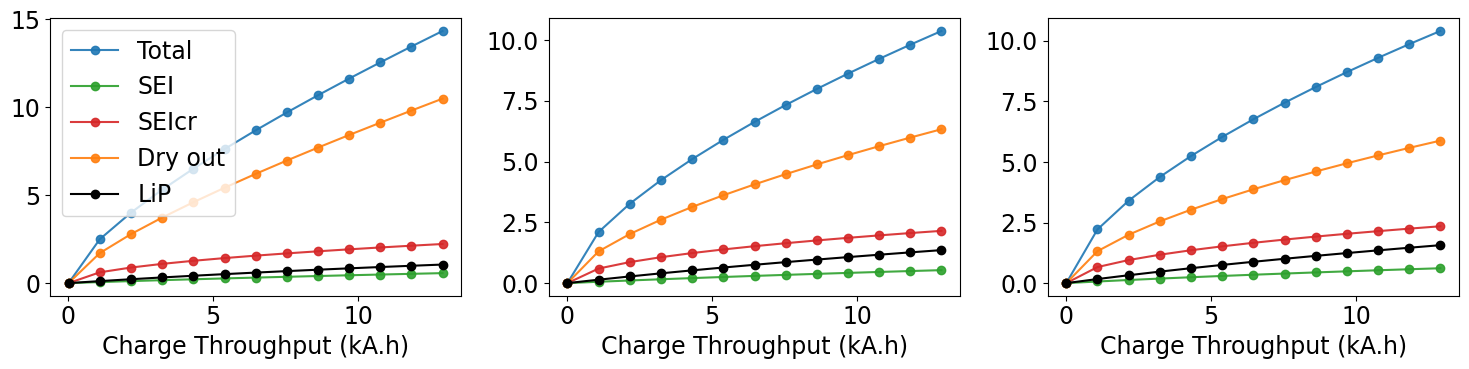

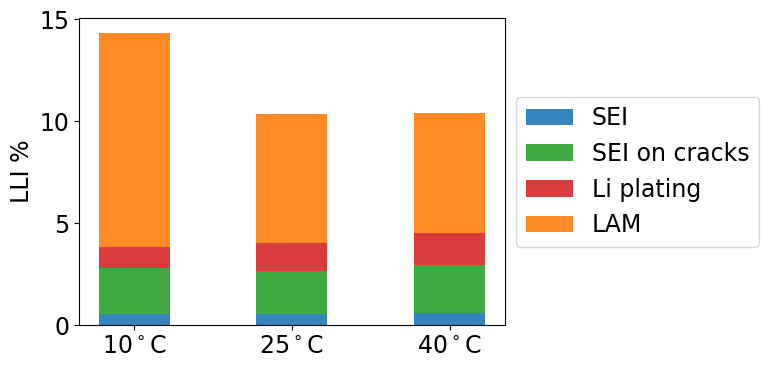

In [138]:
# - LLI  due to SEI, SEI on crack, LiP and dry-out
case = Full_Exp2_GoodFit
LLI_to_SEI_allTs=[];        LLI_to_Dry_allTs =[]; 
LLI_to_SEIcr_allTs = [];    LLI_to_LiP_allTs =[]; 
fig, axs = plt.subplots(1,3, figsize=(15,4),tight_layout=True) 
for i,T_deg in enumerate([10,25,40]):
    LLI_to_SEI = np.array(case[str(T_deg)]['CDend LLI SEI [%]'])
    LLI_to_SEIcr = np.array(case[str(T_deg)]['CDend LLI SEI on cracks [%]'])
    LLI_to_LiP = np.array(case[str(T_deg)]['CDend LLI lithium plating [%]'])
    LLI_to_Dry = (
        np.array(case[str(T_deg)]['CDend LLI [%]'])
        -LLI_to_SEI-LLI_to_LiP-LLI_to_SEIcr)
    
    LLI_to_SEI_allTs.append(LLI_to_SEI[-1])
    LLI_to_Dry_allTs.append(LLI_to_Dry[-1])
    LLI_to_SEIcr_allTs.append(LLI_to_SEIcr[-1])
    LLI_to_LiP_allTs.append(LLI_to_LiP[-1])
    axs[i].plot(
        case[str(T_deg)]['Throughput capacity [kA.h]'], 
        case[str(T_deg)]['CDend LLI [%]'], 
        '-o', color = Default_Colors_Alpha[0], label="Total")
    axs[i].plot(
        case[str(T_deg)]['Throughput capacity [kA.h]'], 
        LLI_to_SEI, 
        '-o', color = Default_Colors_Alpha[1], label="SEI")
    axs[i].plot(
        case[str(T_deg)]['Throughput capacity [kA.h]'], 
        LLI_to_SEIcr, 
        '-o', color = Default_Colors_Alpha[2], label="SEIcr")
    axs[i].plot(
        case[str(T_deg)]['Throughput capacity [kA.h]'], 
        LLI_to_Dry, 
        '-o', color = Default_Colors_Alpha[3], label="Dry out")
    axs[i].plot(
        case[str(T_deg)]['Throughput capacity [kA.h]'], 
        LLI_to_LiP, 
        '-o', color = "k", label="LiP")
    axs[i].set_xlabel("Charge Throughput (kA.h)")
axs[0].legend()

# 
fig, ax = plt.subplots(figsize=(8,4),tight_layout=True) 
X_labels = (
    r"10$^\circ$C",  #axs[i].set_title(f"T={T_deg}"+r"$^\circ$C")
    r"25$^\circ$C",
    r"40$^\circ$C",
)
LLI_Components = {
    "SEI":     np.array(LLI_to_SEI_allTs),
    "SEI on cracks":     np.array(LLI_to_SEIcr_allTs),
    "Li plating":     np.array(LLI_to_LiP_allTs),
    "LAM": np.array(LLI_to_Dry_allTs),
}
width = 0.45

bottom = np.zeros(3)
i=0
for key, weight_count in LLI_Components.items():
    p = ax.bar(X_labels, weight_count, width, label=key, bottom=bottom,color=Default_Colors_Alpha[i])
    bottom += weight_count
    i += 1

legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_ylabel("LLI %")
plt.savefig(
    target_folder + f"/Full LLI break down.png", dpi=dpi)
plt.savefig(
    target_folder + f"/Full LLI break down.svg")  

In [88]:
LAM_to_Dry   = 100-np.array(case[str(T_deg)]['Width_all'])/case[str(T_deg)]['Width_all'][0]*100
print(LAM_to_Dry)

[0.         0.1397409  0.55134461 0.79561226 0.98637625 1.14846237
 1.1924935  1.30682938 1.43572061 1.55471129 1.66582349 1.70498147
 1.78136223 1.88002702 1.97408264 2.06415158 2.10119356 2.15964768
 2.24279285 2.32314822 2.40100572 2.43680747 2.484304   2.55762356
 2.62902428 2.69867702 2.73364109 2.77356739 2.83996269 2.9049341
 2.96859674 3.00294187 3.03724929 3.09843439 3.15850804 3.21755585
 3.25141543 3.28134926 3.33843579 3.39462289 3.449979   3.48344265
 3.50985333 3.56361059 3.61662002 3.66893935 3.70206811 3.72556936
 3.7765557  3.82690717 3.87667417 3.90951223 3.93056359 3.97919952
 4.02728722 4.0748722  4.10745207 4.12641043 4.17302023 4.21915163
 4.26484495]


[7.803258934647856, 2.3840494322833417, 1.5435029385832983]
[4.051546997640871, 2.728520268124612, 1.8775170842557891]
[4.331237074744337, 3.9026303114436445, 4.26484494628717]


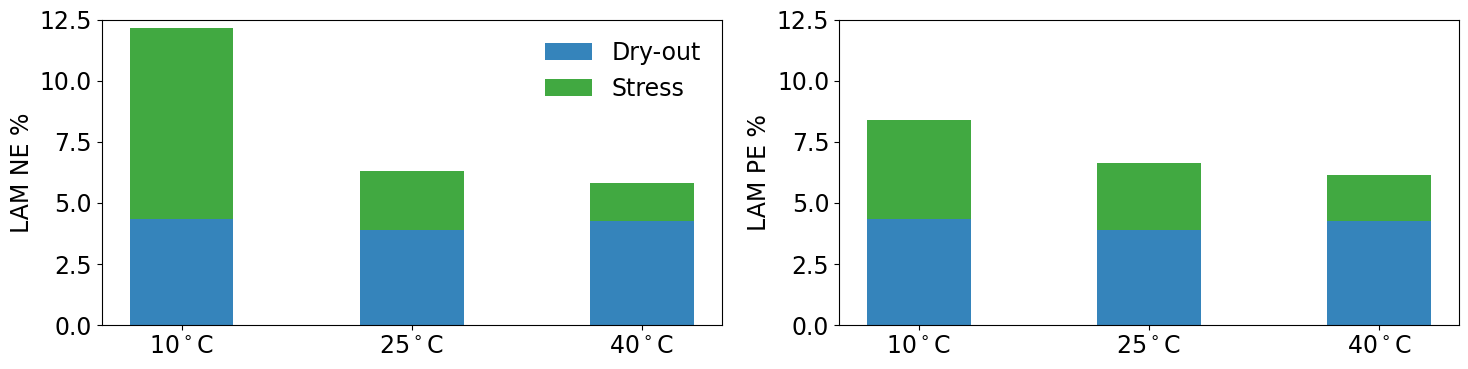

In [108]:
# plot break down of LAM for Full 
# LAM - due to cracking; due to dry-out
case = Full_Exp2_GoodFit
LAM_to_Crack_NE_allTs=[];        LAM_to_Dry_allTs =[];  LAM_to_Crack_PE_allTs=[];  

for i,T_deg in enumerate([10,25,40]):
    LAM_to_Dry   = 100-np.array(case[str(T_deg)]['Width_all'])/case[str(T_deg)]['Width_all'][0]*100

    LAM_to_Dry_allTs.append(LAM_to_Dry[-1])
    LAM_to_Crack_NE_allTs.append(case[str(T_deg)]['CDend LAM_ne [%]'][-1]-LAM_to_Dry[-1])
    LAM_to_Crack_PE_allTs.append(case[str(T_deg)]['CDend LAM_pe [%]'][-1]-LAM_to_Dry[-1])
print(LAM_to_Crack_NE_allTs)
print(LAM_to_Crack_PE_allTs)
print(LAM_to_Dry_allTs)
LAM_NE_Components = {
    "Dry-out": np.array(LAM_to_Dry_allTs),
    "Stress":     np.array(LAM_to_Crack_NE_allTs),}
LAM_PE_Components = {
    "Dry-out": np.array(LAM_to_Dry_allTs),
    "Stress":     np.array(LAM_to_Crack_PE_allTs),}
Labels = ["LAM NE %","LAM PE %"]
fig, axs = plt.subplots(1,2, figsize=(15,4),tight_layout=True) 
width = 0.45

LAM_Components_All = [LAM_NE_Components,LAM_PE_Components]
for k,LAM_Components in enumerate(LAM_Components_All):
    i=0;  bottom = np.zeros(3)
    for key, weight_count in LAM_Components.items():
        p = axs[k].bar(X_labels, weight_count, width, label=key, bottom=bottom,color=Default_Colors_Alpha[i])
        bottom += weight_count
        i += 1
    axs[k].set_ylim(0,12.5) # Labels
    axs[k].set_ylabel(Labels[k])
legend = axs[0].legend(loc='best',frameon=False)
plt.savefig(
    target_folder + f"/Full LAM break down.png", dpi=dpi)
plt.savefig(
    target_folder + f"/Full LAM break down.svg")  

T=40
[0.20578818729560636, 33.98235556014181, 100.0, 100.0, 3.883292768044018, 0.9864613687867153]
[0.8397115444080157, 26.633721300905943, 25.587093948690594, 12.164688452720034, 1.657334262418184, 0.8896464160319358]
[1.026222864872041, 32.613851232610294, 44.42787450311774, 23.333241657201633, 2.282864555434255, 0.8825035680579433]


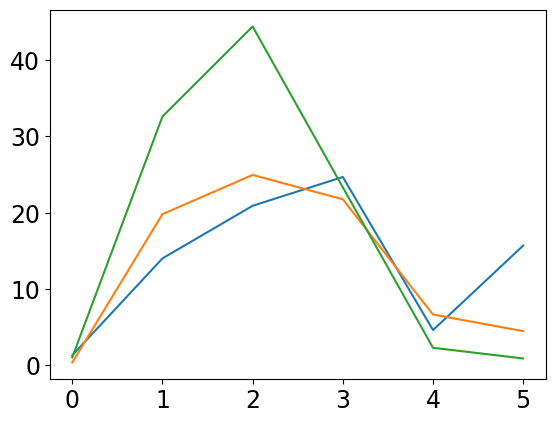

In [31]:
##### Evaluate errors:
# now compare SOH, resistance, and T rise

Cases = [SEI_Exp2_GoodFit,SEIDry_Exp2_GoodFit,Full_Exp2_GoodFit]; Str_cases = ["SEI only","SEI + Dry out","5 coupled",]
# [0,0] --> [0]; [1,1] --> [1]; [1,2] --> [2]
# [0,1] --> [0]; [0,2] --> [1]; [1,0] --> [2]


def Calculate_MPE_re(Temp_Cell_Exp,T_deg,case_i):

    Exp_temp_i_cell = Temp_Cell_Exp[str(int(T_deg))]
    XY_pack = Get_Cell_Mean_1T_1Exp(Exp_Any_AllData,Exp_temp_i_cell) 
    [X_1_st,X_5_st,Y_1_st_avg,Y_2_st_avg,
        Y_3_st_avg,Y_4_st_avg,Y_5_st_avg,Y_6_st_avg]  = XY_pack
    for cell in Exp_temp_i_cell:
        df = Exp_Any_AllData[cell]["Extract Data"]
        chThr_temp = np.array(df["Charge Throughput (A.h)"])/1e3
        df_DMA = Exp_Any_AllData[cell]["DMA"]["LLI_LAM"]

    for cell in Exp_temp_i_cell:
        df = Exp_Any_AllData[cell]["Extract Data"]
        chThr_temp = np.array(df["Charge Throughput (A.h)"])/1e3
        df_DMA = Exp_Any_AllData[cell]["DMA"]["LLI_LAM"]
    # model results
    my_dict_RPT =  case_i[str(T_deg)]
    mX_1 = my_dict_RPT['Throughput capacity [kA.h]']
    if mX_1[-1] > X_1_st[-1]:
        punish = 1; 
        mX_1_st = X_1_st   # do interpolation on modelling result
        mY_1_st = np.interp(mX_1_st,my_dict_RPT['Throughput capacity [kA.h]'], 
            my_dict_RPT['CDend SOH [%]'])
        mY_2_st = np.interp(mX_1_st,my_dict_RPT['Throughput capacity [kA.h]'], 
            my_dict_RPT["CDend LLI [%]"])
        mY_3_st = np.interp(mX_1_st,my_dict_RPT['Throughput capacity [kA.h]'], 
            my_dict_RPT["CDend LAM_ne [%]"])
        mY_4_st = np.interp(mX_1_st,my_dict_RPT['Throughput capacity [kA.h]'], 
            my_dict_RPT["CDend LAM_pe [%]"])
        mY_6_st = np.interp(mX_1_st,my_dict_RPT['Throughput capacity [kA.h]'], 
            my_dict_RPT["avg_Age_T"])
        # experiment result remain unchanged
        Y_1_st_avgm = np.array(Y_1_st_avg)
        Y_2_st_avgm = np.array(Y_2_st_avg)
        Y_3_st_avgm = np.array(Y_3_st_avg)
        Y_4_st_avgm = np.array(Y_4_st_avg)
        Y_6_st_avgm = np.array(Y_6_st_avg)
    else:                # do interpolation on expeirment results
        punish = X_1_st[-1] / mX_1[-1]  # punishment error, add when simulation end early
        mX_1_st = mX_1 #  standard for experiment following modelling
        Y_1_st_avgm = np.interp(mX_1_st,X_1_st,Y_1_st_avg)
        Y_2_st_avgm = np.interp(mX_1_st,X_1_st,Y_2_st_avg)
        Y_3_st_avgm = np.interp(mX_1_st,X_1_st,Y_3_st_avg)
        Y_4_st_avgm = np.interp(mX_1_st,X_1_st,Y_4_st_avg)
        Y_6_st_avgm = np.interp(mX_1_st,X_1_st,Y_6_st_avg)
        mY_1_st = np.array(my_dict_RPT['CDend SOH [%]'])
        mY_2_st = np.array(my_dict_RPT["CDend LLI [%]"])
        mY_3_st = np.array(my_dict_RPT["CDend LAM_ne [%]"])
        mY_4_st = np.array(my_dict_RPT["CDend LAM_pe [%]"])
        mY_6_st = np.array(my_dict_RPT["avg_Age_T"])
    if mX_1[-1] > X_5_st[-1]:
        mX_5_st = X_5_st   
        mY_5_st = np.interp(mX_5_st,my_dict_RPT['Throughput capacity [kA.h]'], 
            my_dict_RPT["Res_0p5C_50SOC"])
        Y_5_st_avgm = np.array(Y_5_st_avg)
    else:
        mX_5_st = mX_1 #  standard for experiment following modelling
        mY_5_st = np.array(my_dict_RPT["Res_0p5C_50SOC"])
        Y_5_st_avgm = np.interp(mX_5_st,X_5_st,Y_5_st_avg).tolist()
    # Now we can calculate MPE! mean_percentage_error
    mpe_1 = mean_percentage_error(Y_1_st_avgm, mY_1_st) # SOH [%]
    mpe_2 = mean_percentage_error(Y_2_st_avgm, mY_2_st) # LLI [%]
    mpe_3 = mean_percentage_error(Y_3_st_avgm, mY_3_st) # LAM_ne [%]
    mpe_4 = mean_percentage_error(Y_4_st_avgm, mY_4_st) # LAM_pe [%]
    mpe_5 = mean_percentage_error(Y_5_st_avgm, mY_5_st) # Res_0p5C_50SOC
    mpe_6 = mean_percentage_error(Y_6_st_avgm, mY_6_st) # Age set average temperature (degC)
    # total MPE: TODO this is where weighting works
    # SOH and Resistance are directly measured so give more weight; 
    # DMA result is derived from pOCV and come with certain errors
    mpe_pack = [mpe_1,mpe_2,mpe_3,mpe_4,mpe_5,mpe_6]

    
    return mpe_pack

index_exp = 2; Exp_Any_AllData = Exp_2_AllData;  
Temp_Cell_Exp = Temp_Cell_Exp_All[index_exp-1] 
T_deg_All = [10,25,40] 

MPE_All = {}
for i,case in enumerate(Cases):
    MPE_All[Str_cases[i]] = []
for i,case in enumerate(Cases):
    for T_deg in T_deg_All:
        MPE_All[Str_cases[i]].append(Calculate_MPE_re(Temp_Cell_Exp,T_deg,case))
#print(MPE_All)
i=2
plt.plot(MPE_All[Str_cases[i]][0]) # T=10
plt.plot(MPE_All[Str_cases[i]][1]) # T=25
plt.plot(MPE_All[Str_cases[i]][2]) # T=25
# for 10degC:
j = 2
print(f"T={T_deg_All[j]}")
for i in range(3):
    #print(Str_cases[i])
    print(MPE_All[Str_cases[i]][j])



In [32]:
mY_2_st.tolist()

NameError: name 'mY_2_st' is not defined

In [ ]:
# most exciting part, compare DMA